# Jupyter notebook to plot petrological rock catalogue  


This notebook plot density and susceptibility relationship and boxplots for all rock samples devided by formation and rock type.

#### jupyter notebook written by Maximilian Lowe (maxwe32@bas.ac.uk). Last update 06/03/2024

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm
import os
import cartopy.crs as ccrs
from shapely.geometry.polygon import Polygon

In [2]:
export_fig_path_NAPA = "Petrological_data/Figure/"
# Create path if it does not exists
if not os.path.exists(export_fig_path_NAPA):
    os.makedirs(export_fig_path_NAPA)

# load data

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

NAPA_measurments_df = pd.read_csv(
    "Petrological_data/Density_and_susceptibility_rock_sample_catalogue_northern_Victoria_Land_East_Antarctica.csv",
    skiprows=43,
)

NAPA_measurments_df["susceptibility_1 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_1 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_2 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_2 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_3 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_3 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_4 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_4 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_5 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_5 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_6 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_6 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_7 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_7 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_8 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_8 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_average (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_average (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_std (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_std (10-3 SI)"] * 1e-3
)

filename = "DATA/GeoMap_Coastline_df.geojson"
file = open(filename)
Coastline = gpd.read_file(file)

# Sorted by formation

#### Berg Group

In [4]:
NAPA_Berg_Group_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Berg Group")
]

NAPA_Berg_Group_density_mean = np.mean(NAPA_Berg_Group_df["density (g/cm^3)"])
NAPA_Berg_Group_density_std = np.std(NAPA_Berg_Group_df["density (g/cm^3)"])
NAPA_Berg_Group_sus_mean = np.mean(
    NAPA_Berg_Group_df["susceptibility_average (10-3 SI)"]
)
NAPA_Berg_Group_sus_std = np.std(NAPA_Berg_Group_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Berg_Group_gpdf = gpd.GeoDataFrame(
    NAPA_Berg_Group_df,
    geometry=gpd.points_from_xy(
        NAPA_Berg_Group_df["lon_decimal (degree_east)"],
        NAPA_Berg_Group_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Berg_Group_ps_gpdf = NAPA_Berg_Group_gpdf.to_crs(3031)

#### Bowers Supergroup

In [5]:
NAPA_Bowers_Supergroup_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Bowers Supergroup")
]

NAPA_Bowers_Supergroup_density_mean = np.mean(
    NAPA_Bowers_Supergroup_df["density (g/cm^3)"]
)
NAPA_Bowers_Supergroup_density_std = np.std(
    NAPA_Bowers_Supergroup_df["density (g/cm^3)"]
)
NAPA_Bowers_Supergroup_sus_mean = np.mean(
    NAPA_Bowers_Supergroup_df["susceptibility_average (10-3 SI)"]
)
NAPA_Bowers_Supergroup_sus_std = np.std(
    NAPA_Bowers_Supergroup_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Bowers_Supergroup_gpdf = gpd.GeoDataFrame(
    NAPA_Bowers_Supergroup_df,
    geometry=gpd.points_from_xy(
        NAPA_Bowers_Supergroup_df["lon_decimal (degree_east)"],
        NAPA_Bowers_Supergroup_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Bowers_Supergroup_ps_gpdf = NAPA_Bowers_Supergroup_gpdf.to_crs(3031)

#### Exposure Hill type deposits

In [6]:
NAPA_Exposure_Hill_type_deposits_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Exposure Hill type deposits")
]


NAPA_Exposure_Hill_type_deposits_density_mean = np.mean(
    NAPA_Exposure_Hill_type_deposits_df["density (g/cm^3)"]
)
NAPA_Exposure_Hill_type_deposits_density_std = np.std(
    NAPA_Exposure_Hill_type_deposits_df["density (g/cm^3)"]
)
NAPA_Exposure_Hill_type_deposits_sus_mean = np.mean(
    NAPA_Exposure_Hill_type_deposits_df["susceptibility_average (10-3 SI)"]
)
NAPA_Exposure_Hill_type_deposits_sus_std = np.std(
    NAPA_Exposure_Hill_type_deposits_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Exposure_Hill_type_deposits_gpdf = gpd.GeoDataFrame(
    NAPA_Exposure_Hill_type_deposits_df,
    geometry=gpd.points_from_xy(
        NAPA_Exposure_Hill_type_deposits_df["lon_decimal (degree_east)"],
        NAPA_Exposure_Hill_type_deposits_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Exposure_Hill_type_deposits_ps_gpdf = NAPA_Exposure_Hill_type_deposits_gpdf.to_crs(
    3031
)

#### Ferrar

In [7]:
NAPA_Ferrar_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Ferrar Dolerites")
    | (NAPA_measurments_df["stratigraphy"] == "Ferrar Dolerite")
]


NAPA_Ferrar_density_mean = np.mean(NAPA_Ferrar_df["density (g/cm^3)"])
NAPA_Ferrar_density_std = np.std(NAPA_Ferrar_df["density (g/cm^3)"])
NAPA_Ferrar_sus_mean = np.mean(NAPA_Ferrar_df["susceptibility_average (10-3 SI)"])
NAPA_Ferrar_sus_std = np.std(NAPA_Ferrar_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Ferrar_gpdf = gpd.GeoDataFrame(
    NAPA_Ferrar_df,
    geometry=gpd.points_from_xy(
        NAPA_Ferrar_df["lon_decimal (degree_east)"],
        NAPA_Ferrar_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Ferrar_ps_gpdf = NAPA_Ferrar_gpdf.to_crs(3031)

#### Granite Harbour Intrusives

In [8]:
NAPA_GHI_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Granite Harbour Intrusives")
]

NAPA_GHI_density_mean = np.mean(NAPA_GHI_df["density (g/cm^3)"])
NAPA_GHI_density_std = np.std(NAPA_GHI_df["density (g/cm^3)"])
NAPA_GHI_sus_mean = np.mean(NAPA_GHI_df["susceptibility_average (10-3 SI)"])
NAPA_GHI_sus_std = np.std(NAPA_GHI_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_GHI_gpdf = gpd.GeoDataFrame(
    NAPA_GHI_df,
    geometry=gpd.points_from_xy(
        NAPA_GHI_df["lon_decimal (degree_east)"],
        NAPA_GHI_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_GHI_ps_gpdf = NAPA_GHI_gpdf.to_crs(3031)

print("GHI density mean: ", NAPA_GHI_density_mean)
print("GHI density std: ", NAPA_GHI_density_std)
print("GHI sus mean: ", NAPA_GHI_sus_mean)
print("GHI sus std: ", NAPA_GHI_sus_std)

GHI density mean:  2.6808591549295766
GHI density std:  0.17623769926306737
GHI sus mean:  0.0031463996478873235
GHI sus std:  0.006981043219150668


#### Kirkpatrick Basalts

In [9]:
NAPA_Kirkpatrick_Basalts_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Kirkpatrick Basalts")
    | (NAPA_measurments_df["stratigraphy"] == "Kirkpatrick Laven")
]


NAPA_Kirkpatrick_Basalts_density_mean = np.mean(
    NAPA_Kirkpatrick_Basalts_df["density (g/cm^3)"]
)
NAPA_Kirkpatrick_Basalts_density_std = np.std(
    NAPA_Kirkpatrick_Basalts_df["density (g/cm^3)"]
)
NAPA_Kirkpatrick_Basalts_sus_mean = np.mean(
    NAPA_Kirkpatrick_Basalts_df["susceptibility_average (10-3 SI)"]
)
NAPA_Kirkpatrick_Basalts_sus_std = np.std(
    NAPA_Kirkpatrick_Basalts_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Kirkpatrick_Basalts_gpdf = gpd.GeoDataFrame(
    NAPA_Kirkpatrick_Basalts_df,
    geometry=gpd.points_from_xy(
        NAPA_Kirkpatrick_Basalts_df["lon_decimal (degree_east)"],
        NAPA_Kirkpatrick_Basalts_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Kirkpatrick_Basalts_ps_gpdf = NAPA_Kirkpatrick_Basalts_gpdf.to_crs(3031)

print("KPB density mean: ", NAPA_Kirkpatrick_Basalts_density_mean)
print("KPB density std: ", NAPA_Kirkpatrick_Basalts_density_std)
print("KPB sus mean: ", NAPA_Kirkpatrick_Basalts_sus_mean)
print("KPB sus std: ", NAPA_Kirkpatrick_Basalts_sus_std)

KPB density mean:  2.6852586206896554
KPB density std:  0.2055574053845843
KPB sus mean:  0.006189611853448276
KPB sus std:  0.0058036960730877205


#### Meander Intrusives

In [10]:
NAPA_Meander_Intrusives_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Meander Intrusives")
]

NAPA_Meander_Intrusives_density_mean = np.mean(
    NAPA_Meander_Intrusives_df["density (g/cm^3)"]
)
NAPA_Meander_Intrusives_density_std = np.std(
    NAPA_Meander_Intrusives_df["density (g/cm^3)"]
)
NAPA_Meander_Intrusives_sus_mean = np.mean(
    NAPA_Meander_Intrusives_df["susceptibility_average (10-3 SI)"]
)
NAPA_Meander_Intrusives_sus_std = np.std(
    NAPA_Meander_Intrusives_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Meander_Intrusives_gpdf = gpd.GeoDataFrame(
    NAPA_Meander_Intrusives_df,
    geometry=gpd.points_from_xy(
        NAPA_Meander_Intrusives_df["lon_decimal (degree_east)"],
        NAPA_Meander_Intrusives_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Meander_Intrusives_ps_gpdf = NAPA_Meander_Intrusives_gpdf.to_crs(3031)

#### Oates Coast Granites 

In [11]:
NAPA_Oates_Coast_Granites_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Oates Coast Granites")
]

NAPA_Oates_Coast_Granites_density_mean = np.mean(
    NAPA_Oates_Coast_Granites_df["density (g/cm^3)"]
)
NAPA_Oates_Coast_Granites_density_std = np.std(
    NAPA_Oates_Coast_Granites_df["density (g/cm^3)"]
)
NAPA_Oates_Coast_Granites_sus_mean = np.mean(
    NAPA_Oates_Coast_Granites_df["susceptibility_average (10-3 SI)"]
)
NAPA_Oates_Coast_Granites_sus_std = np.std(
    NAPA_Oates_Coast_Granites_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Oates_Coast_Granites_gpdf = gpd.GeoDataFrame(
    NAPA_Oates_Coast_Granites_df,
    geometry=gpd.points_from_xy(
        NAPA_Oates_Coast_Granites_df["lon_decimal (degree_east)"],
        NAPA_Oates_Coast_Granites_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Oates_Coast_Granites_ps_gpdf = NAPA_Oates_Coast_Granites_gpdf.to_crs(3031)

#### Robertson Bay Group

In [12]:
NAPA_Robertson_Bay_Group_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Robertson Bay Group")
]

NAPA_Robertson_Bay_Group_density_mean = np.mean(
    NAPA_Robertson_Bay_Group_df["density (g/cm^3)"]
)
NAPA_Robertson_Bay_Group_density_std = np.std(
    NAPA_Robertson_Bay_Group_df["density (g/cm^3)"]
)
NAPA_Robertson_Bay_Group_sus_mean = np.mean(
    NAPA_Robertson_Bay_Group_df["susceptibility_average (10-3 SI)"]
)
NAPA_Robertson_Bay_Group_sus_std = np.std(
    NAPA_Robertson_Bay_Group_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Robertson_Bay_Group_gpdf = gpd.GeoDataFrame(
    NAPA_Robertson_Bay_Group_df,
    geometry=gpd.points_from_xy(
        NAPA_Robertson_Bay_Group_df["lon_decimal (degree_east)"],
        NAPA_Robertson_Bay_Group_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Robertson_Bay_Group_ps_gpdf = NAPA_Robertson_Bay_Group_gpdf.to_crs(3031)

#### Wilson Metamorphic Complex

In [13]:
NAPA_Wilson_Metamorphic_Complex_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Metamorphic Complex")
]

NAPA_Wilson_Metamorphic_Complex_density_mean = np.mean(
    NAPA_Wilson_Metamorphic_Complex_df["density (g/cm^3)"]
)
NAPA_Wilson_Metamorphic_Complex_density_std = np.std(
    NAPA_Wilson_Metamorphic_Complex_df["density (g/cm^3)"]
)
NAPA_Wilson_Metamorphic_Complex_sus_mean = np.mean(
    NAPA_Wilson_Metamorphic_Complex_df["susceptibility_average (10-3 SI)"]
)
NAPA_Wilson_Metamorphic_Complex_sus_std = np.std(
    NAPA_Wilson_Metamorphic_Complex_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Wilson_Metamorphic_Complex_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Metamorphic_Complex_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Metamorphic_Complex_df["lon_decimal (degree_east)"],
        NAPA_Wilson_Metamorphic_Complex_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Metamorphic_Complex_ps_gpdf = NAPA_Wilson_Metamorphic_Complex_gpdf.to_crs(
    3031
)

#### Wilson Polymetamorphic Complex

In [14]:
NAPA_Wilson_Polymetamorphic_Complex_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Polymetamorphic Complex")
]

NAPA_Wilson_Polymetamorphic_Complex_density_mean = np.mean(
    NAPA_Wilson_Polymetamorphic_Complex_df["density (g/cm^3)"]
)
NAPA_Wilson_Polymetamorphic_Complex_density_std = np.std(
    NAPA_Wilson_Polymetamorphic_Complex_df["density (g/cm^3)"]
)
NAPA_Wilson_Polymetamorphic_Complex_sus_mean = np.mean(
    NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_average (10-3 SI)"]
)
NAPA_Wilson_Polymetamorphic_Complex_sus_std = np.std(
    NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Wilson_Polymetamorphic_Complex_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Polymetamorphic_Complex_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Polymetamorphic_Complex_df["lon_decimal (degree_east)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf = (
    NAPA_Wilson_Polymetamorphic_Complex_gpdf.to_crs(3031)
)

#### Wilson Schist

In [15]:
NAPA_Wilson_Schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Schist")
]

NAPA_Wilson_Schist_density_mean = np.mean(NAPA_Wilson_Schist_df["density (g/cm^3)"])
NAPA_Wilson_Schist_density_std = np.std(NAPA_Wilson_Schist_df["density (g/cm^3)"])
NAPA_Wilson_Schist_sus_mean = np.mean(
    NAPA_Wilson_Schist_df["susceptibility_average (10-3 SI)"]
)
NAPA_Wilson_Schist_sus_std = np.std(
    NAPA_Wilson_Schist_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Wilson_Schist_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Schist_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Schist_df["lon_decimal (degree_east)"],
        NAPA_Wilson_Schist_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Schist_ps_gpdf = NAPA_Wilson_Schist_gpdf.to_crs(3031)

#### Millen Schist

In [16]:
NAPA_Millen_Schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Millen Schist")
]

NAPA_Millen_Schist_density_mean = np.mean(NAPA_Millen_Schist_df["density (g/cm^3)"])
NAPA_Millen_Schist_density_std = np.std(NAPA_Millen_Schist_df["density (g/cm^3)"])
NAPA_Millen_Schist_sus_mean = np.mean(
    NAPA_Millen_Schist_df["susceptibility_average (10-3 SI)"]
)
NAPA_Millen_Schist_sus_std = np.std(
    NAPA_Millen_Schist_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Millen_Schist_gpdf = gpd.GeoDataFrame(
    NAPA_Millen_Schist_df,
    geometry=gpd.points_from_xy(
        NAPA_Millen_Schist_df["lon_decimal (degree_east)"],
        NAPA_Millen_Schist_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Millen_Schist_ps_gpdf = NAPA_Millen_Schist_gpdf.to_crs(3031)

# Plot rock formation data

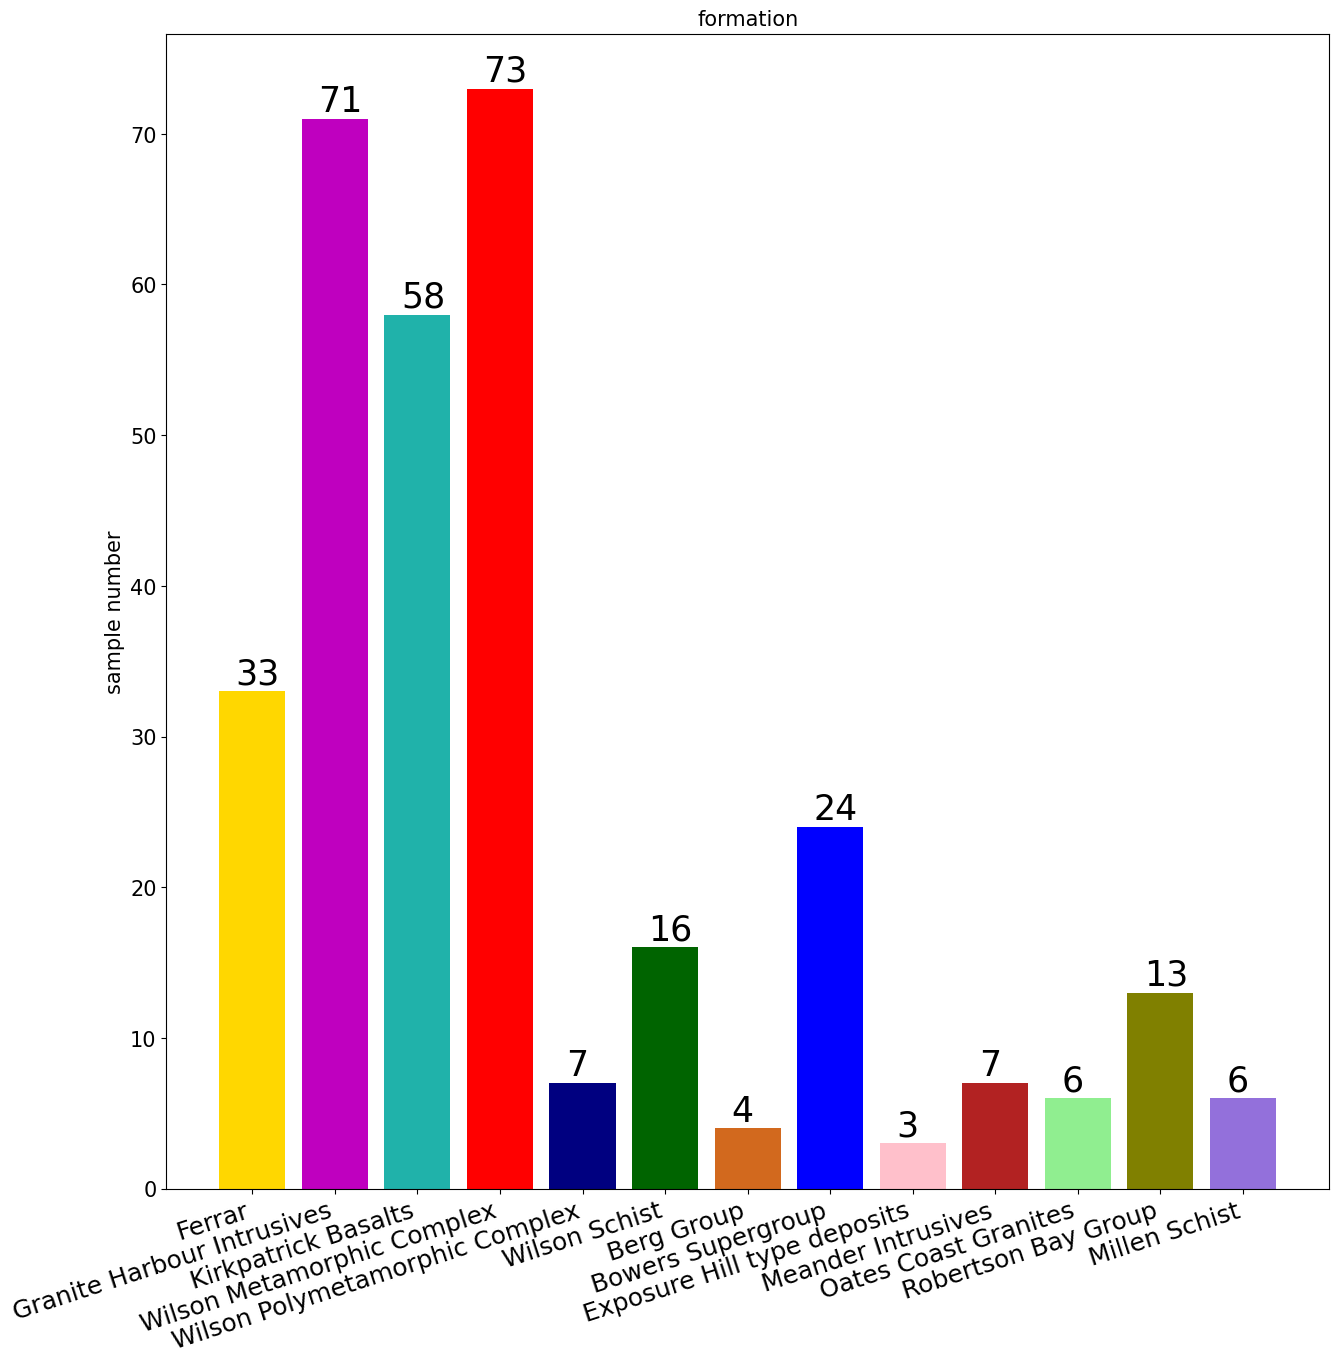

In [17]:
x_category = [
    "Ferrar",
    "Granite Harbour Intrusives",
    "Kirkpatrick Basalts",
    "Wilson Metamorphic Complex",
    "Wilson Polymetamorphic Complex",
    "Wilson Schist",
    "Berg Group",
    "Bowers Supergroup",
    "Exposure Hill type deposits",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Robertson Bay Group",
    "Millen Schist",
]

y_sample_num = [
    len(NAPA_Ferrar_df),
    len(NAPA_GHI_df),
    len(NAPA_Kirkpatrick_Basalts_df),
    len(NAPA_Wilson_Metamorphic_Complex_df),
    len(NAPA_Wilson_Polymetamorphic_Complex_df),
    len(NAPA_Wilson_Schist_df),
    len(NAPA_Berg_Group_df),
    len(NAPA_Bowers_Supergroup_df),
    len(NAPA_Exposure_Hill_type_deposits_df),
    len(NAPA_Meander_Intrusives_df),
    len(NAPA_Oates_Coast_Granites_df),
    len(NAPA_Robertson_Bay_Group_df),
    len(NAPA_Millen_Schist_df),
]

# plot
figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

plt.bar(
    x_category,
    y_sample_num,
    color=[
        "gold",
        "m",
        "lightseagreen",
        "red",
        "navy",
        "darkgreen",
        "chocolate",
        "blue",
        "pink",
        "firebrick",
        "lightgreen",
        "olive",
        "mediumpurple",
    ],
)

plt.title("formation", fontsize=15)
plt.ylabel("sample number", fontsize=15)
plt.setp(ax1.get_xticklabels(), rotation=18, ha="right")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.xaxis.set_tick_params(labelsize=18)
# ax1.grid(visible=True, which='major' ,axis='y' , color='k', linestyle='-' , alpha=0.35)

for p in ax1.patches:
    ax1.annotate(
        "{:.0f}".format(p.get_height()),
        (p.get_x() + 0.20, p.get_height() + 0.5),
        fontsize=25,
    )

plt.savefig(
    export_fig_path_NAPA + "sample_histogramm_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

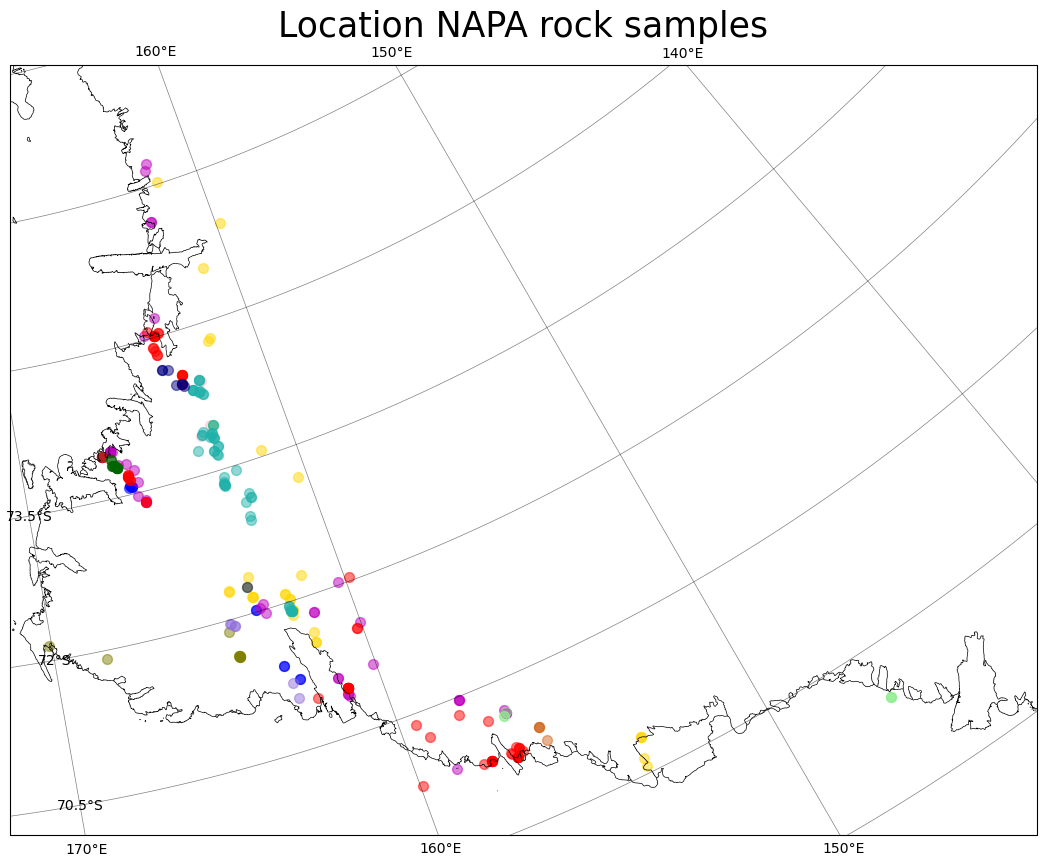

In [18]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)


NAPA_Berg_Group_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="chocolate", 
    markersize=50, 
    alpha=0.5, 
    label="Berg Group"
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="blue",
    markersize=50,
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="pink",
    markersize=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)

NAPA_Ferrar_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="gold",
    markersize=50, 
    alpha=0.5, 
    label="Ferrar"
)

NAPA_GHI_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="m",
    markersize=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="lightseagreen",
    markersize=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)

NAPA_Meander_Intrusives_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="firebrick",
    markersize=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="lightgreen",
    markersize=50,
    alpha=0.5,
    label="Oates Coast Granites",
)

NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="olive",
    markersize=50,
    alpha=0.5,
    label="Robertson Bay Group",
)

NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="red",
    markersize=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)

NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="navy",
    markersize=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)

NAPA_Wilson_Schist_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="darkgreen",
    markersize=50,
    alpha=0.5,
    label="Wilson Schist",
)

NAPA_Millen_Schist_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="mediumpurple",
    markersize=50,
    alpha=0.5,
    label="Millen Schist",
)

ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.2e6, -1.3e6])

# ax1.legend(loc='upper right')
ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "formation_location_zoom_paper.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### Susceptibility box plots

In [19]:
Berg_Group_all_sus_NAPA = np.vstack(
    [
        NAPA_Berg_Group_df["susceptibility_1 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_2 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_3 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_4 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_5 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_6 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_7 (10-3 SI)"],
        NAPA_Berg_Group_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Bowers_Supergroup_all_sus_NAPA = np.vstack(
    [
        NAPA_Bowers_Supergroup_df["susceptibility_1 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_2 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_3 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_4 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_5 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_6 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_7 (10-3 SI)"],
        NAPA_Bowers_Supergroup_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Exposure_Hill_type_deposits_all_sus_NAPA = np.vstack(
    [
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_1 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_2 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_3 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_4 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_5 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_6 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_7 (10-3 SI)"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Ferrar_all_sus_NAPA = np.vstack(
    [
        NAPA_Ferrar_df["susceptibility_1 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_2 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_3 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_4 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_5 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_6 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_7 (10-3 SI)"],
        NAPA_Ferrar_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Granite_Harbour_Intrusives_all_sus_NAPA = np.vstack(
    [
        NAPA_GHI_df["susceptibility_1 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_2 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_3 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_4 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_5 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_6 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_7 (10-3 SI)"],
        NAPA_GHI_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Kirkpatrick_Basalts_all_sus_NAPA = np.vstack(
    [
        NAPA_Kirkpatrick_Basalts_df["susceptibility_1 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_2 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_3 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_4 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_5 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_6 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_7 (10-3 SI)"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Meander_Intrusives_all_sus_NAPA = np.vstack(
    [
        NAPA_Meander_Intrusives_df["susceptibility_1 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_2 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_3 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_4 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_5 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_6 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_7 (10-3 SI)"],
        NAPA_Meander_Intrusives_df["susceptibility_8 (10-3 SI)"],
    ]
).T

NAPA_Oates_Coast_Granites_all_sus_NAPA = np.vstack(
    [
        NAPA_Oates_Coast_Granites_df["susceptibility_1 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_2 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_3 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_4 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_5 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_6 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_7 (10-3 SI)"],
        NAPA_Oates_Coast_Granites_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Robertson_Bay_Group_all_sus_NAPA = np.vstack(
    [
        NAPA_Robertson_Bay_Group_df["susceptibility_1 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_2 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_3 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_4 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_5 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_6 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_7 (10-3 SI)"],
        NAPA_Robertson_Bay_Group_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Wilson_Metamorphic_Complex_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_1 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_2 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_3 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_4 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_5 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_6 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_7 (10-3 SI)"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Wilson_Polymetamorphic_Complex_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_1 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_2 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_3 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_4 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_5 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_6 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_7 (10-3 SI)"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Wilson_Schist_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Schist_df["susceptibility_1 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_2 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_3 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_4 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_5 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_6 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_7 (10-3 SI)"],
        NAPA_Wilson_Schist_df["susceptibility_8 (10-3 SI)"],
    ]
).T

Millen_Schist_all_sus_NAPA = np.vstack(
    [
        NAPA_Millen_Schist_df["susceptibility_1 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_2 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_3 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_4 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_5 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_6 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_7 (10-3 SI)"],
        NAPA_Millen_Schist_df["susceptibility_8 (10-3 SI)"],
    ]
).T

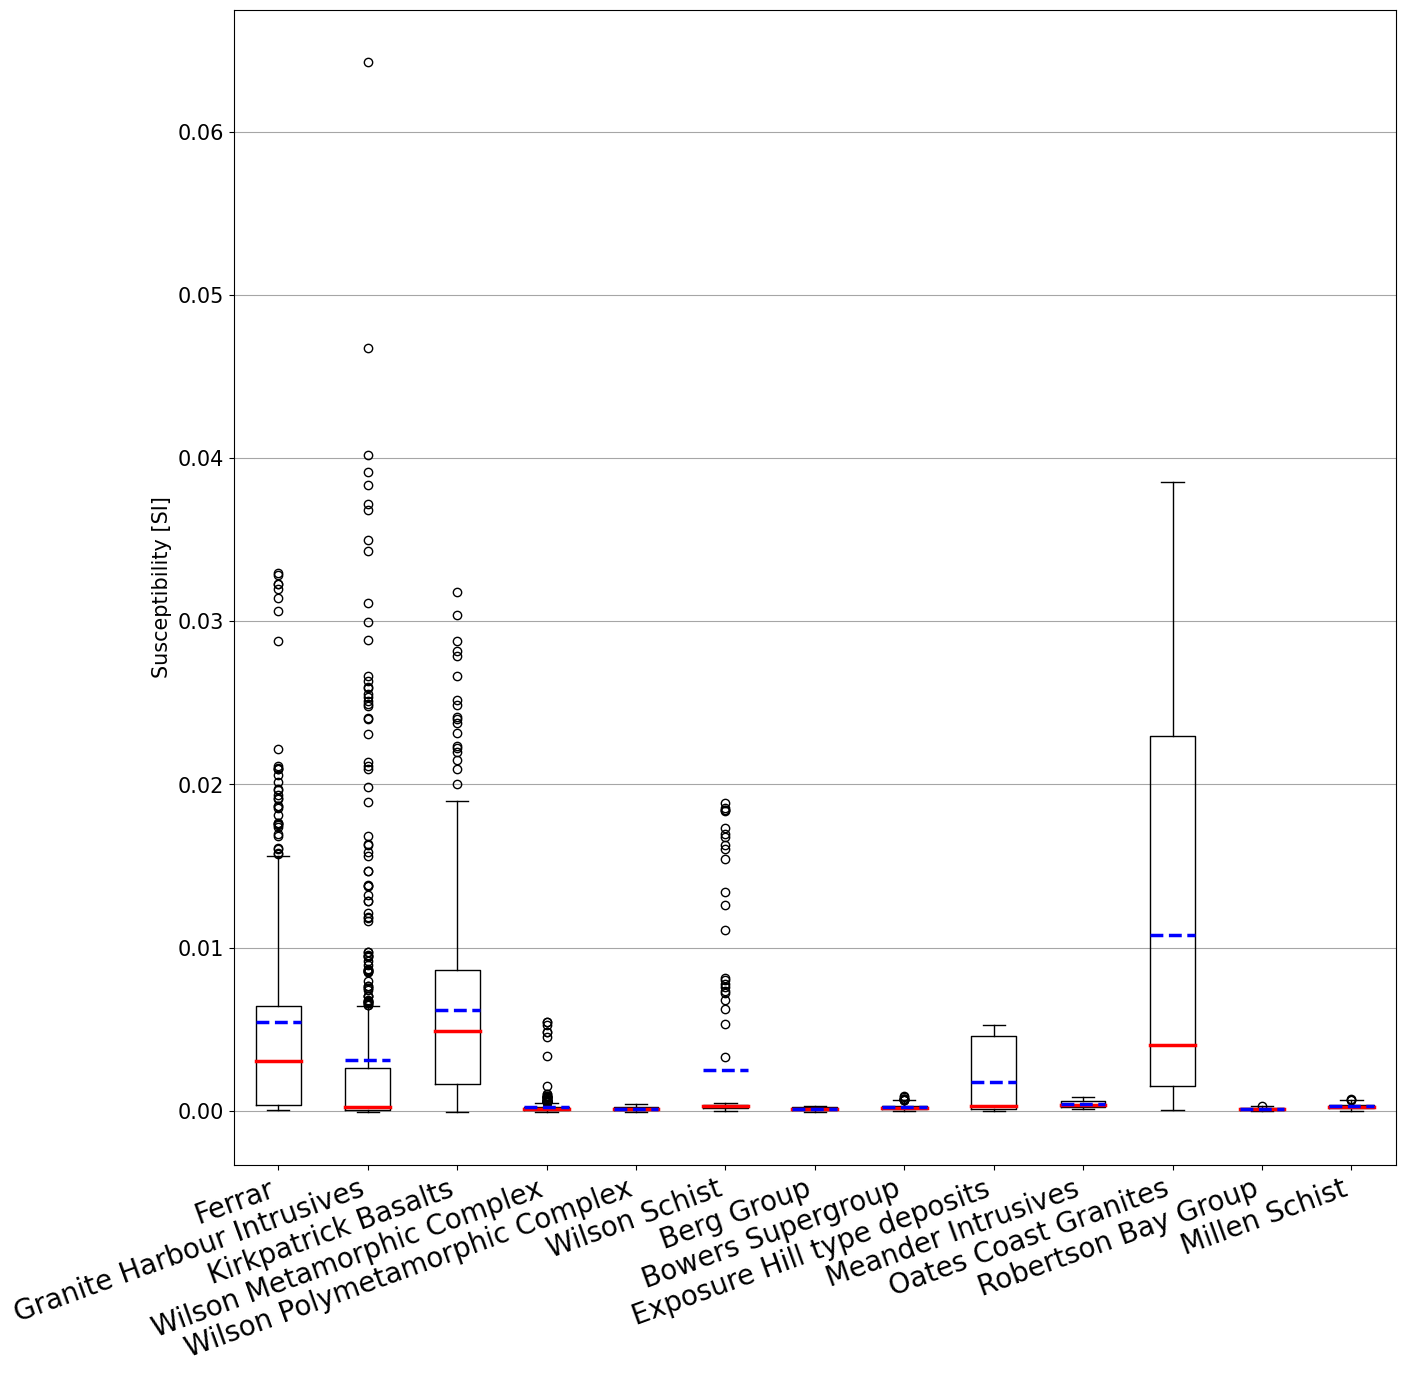

In [20]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")

sus_values_ls = [
    Ferrar_all_sus_NAPA.flatten(),
    Granite_Harbour_Intrusives_all_sus_NAPA.flatten(),
    Kirkpatrick_Basalts_all_sus_NAPA.flatten(),
    Wilson_Metamorphic_Complex_all_sus_NAPA.flatten(),
    Wilson_Polymetamorphic_Complex_all_sus_NAPA.flatten(),
    Wilson_Schist_all_sus_NAPA.flatten(),
    Berg_Group_all_sus_NAPA.flatten(),
    Bowers_Supergroup_all_sus_NAPA.flatten(),
    Exposure_Hill_type_deposits_all_sus_NAPA.flatten(),
    Meander_Intrusives_all_sus_NAPA.flatten(),
    NAPA_Oates_Coast_Granites_all_sus_NAPA.flatten(),
    Robertson_Bay_Group_all_sus_NAPA.flatten(),
    Millen_Schist_all_sus_NAPA.flatten(),
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)
ax1.boxplot(
    sus_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)
x_labels = [
    "Ferrar",
    "Granite Harbour Intrusives",
    "Kirkpatrick Basalts",
    "Wilson Metamorphic Complex",
    "Wilson Polymetamorphic Complex",
    "Wilson Schist",
    "Berg Group",
    "Bowers Supergroup",
    "Exposure Hill type deposits",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Robertson Bay Group",
    "Millen Schist",
]

x_ticks_num = np.arange(1, 14, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=20, ha="right")
ax1.set_ylabel("Susceptibility [SI]", fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_susceptbility_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

##### Density box plots

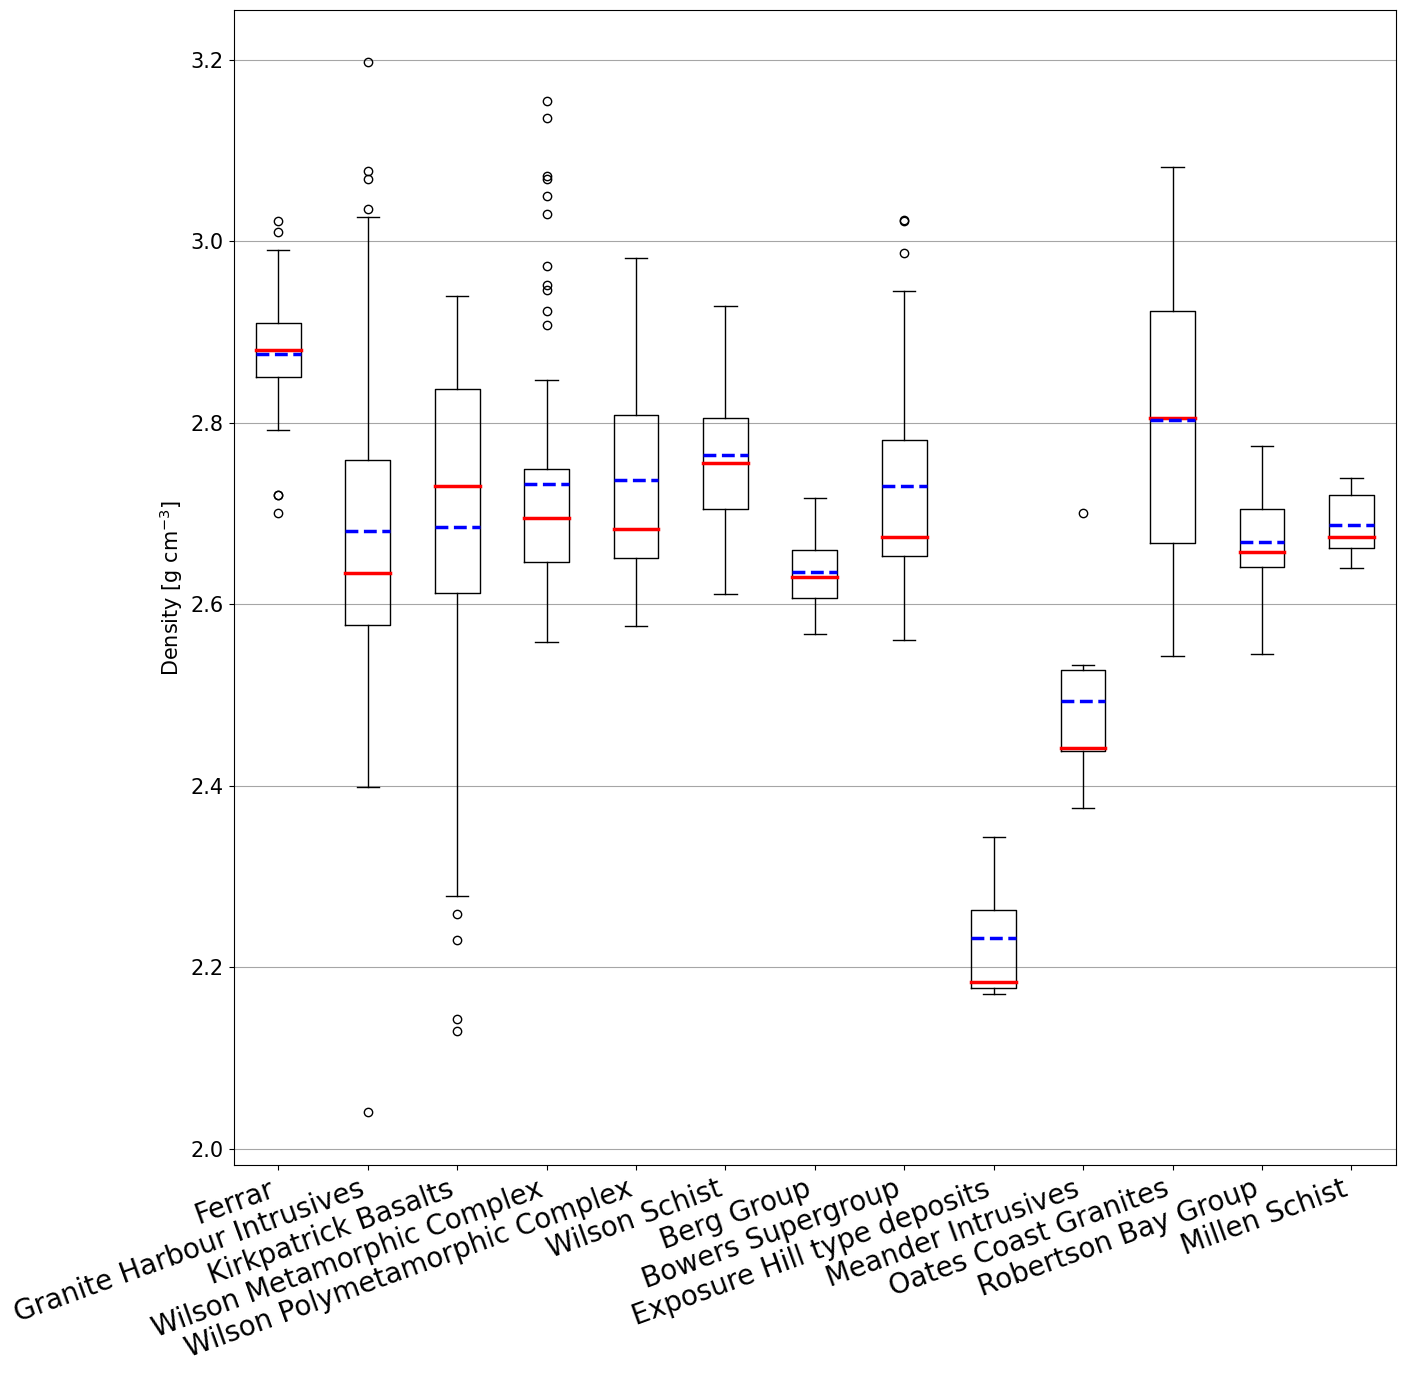

In [21]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


dens_values_ls = [
    NAPA_Ferrar_df["density (g/cm^3)"],
    NAPA_GHI_df["density (g/cm^3)"],
    NAPA_Kirkpatrick_Basalts_df["density (g/cm^3)"],
    NAPA_Wilson_Metamorphic_Complex_df["density (g/cm^3)"],
    NAPA_Wilson_Polymetamorphic_Complex_df["density (g/cm^3)"],
    NAPA_Wilson_Schist_df["density (g/cm^3)"],
    NAPA_Berg_Group_df["density (g/cm^3)"],
    NAPA_Bowers_Supergroup_df["density (g/cm^3)"],
    NAPA_Exposure_Hill_type_deposits_df["density (g/cm^3)"],
    NAPA_Meander_Intrusives_df["density (g/cm^3)"],
    NAPA_Oates_Coast_Granites_df["density (g/cm^3)"],
    NAPA_Robertson_Bay_Group_df["density (g/cm^3)"],
    NAPA_Millen_Schist_df["density (g/cm^3)"],
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    dens_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Ferrar",
    "Granite Harbour Intrusives",
    "Kirkpatrick Basalts",
    "Wilson Metamorphic Complex",
    "Wilson Polymetamorphic Complex",
    "Wilson Schist",
    "Berg Group",
    "Bowers Supergroup",
    "Exposure Hill type deposits",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Robertson Bay Group",
    "Millen Schist",
]

x_ticks_num = np.arange(1, 14, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=20, ha="right")
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_desnity_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

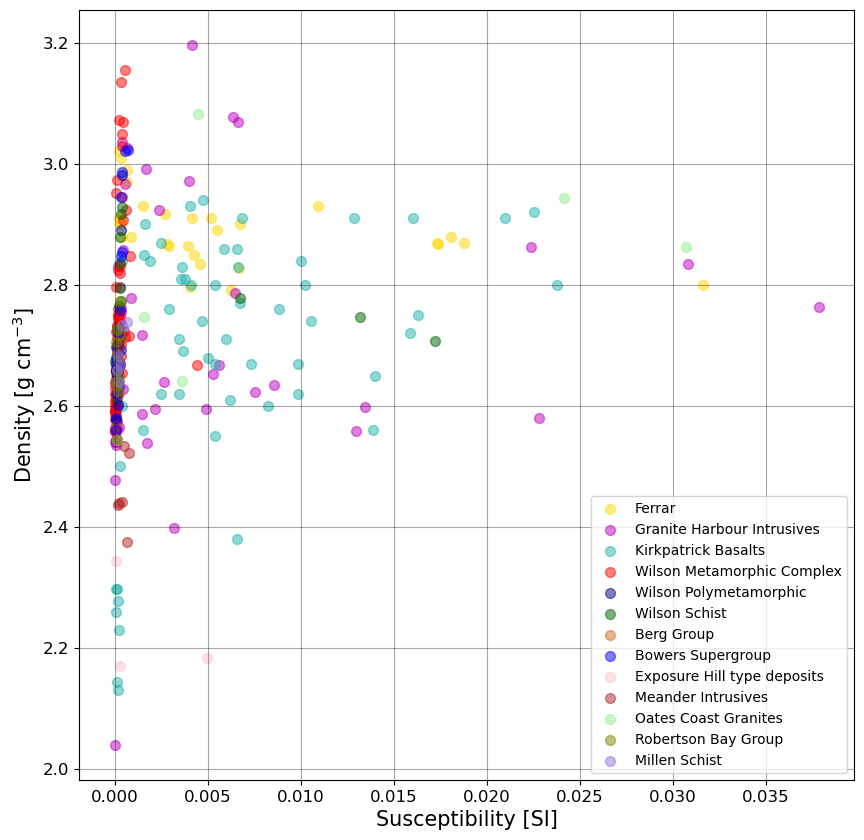

In [22]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)




NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
    label="Ferrar",
)

NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)

NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
    label="Wilson Schist",
)

NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="Berg Group",
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)

NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
    label="Oates Coast Granites",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
    label="Robertson Bay Group",
)

NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
    label="Millen Schist",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

In [23]:
zoom_x = [-0.0005, 0.002, 0.002, -0.0005, -0.0005]
zoom_y = [2, 2, 3.2, 3.2, 2]

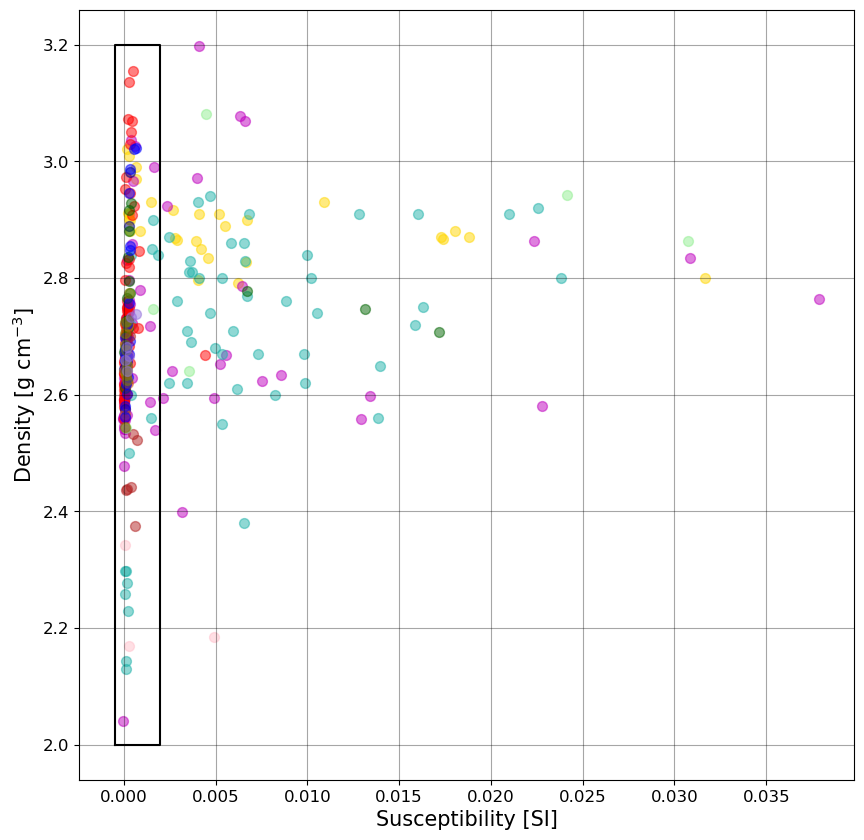

In [24]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
)

NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
)

NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
)

NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
)

NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
)

NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

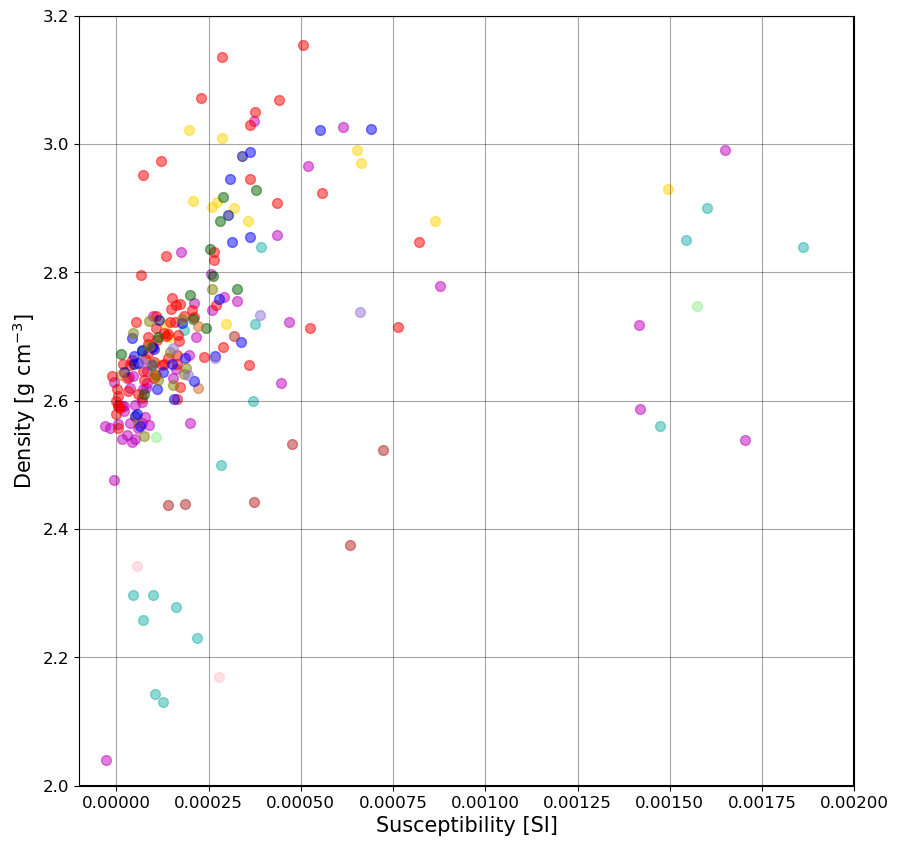

In [25]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
)

NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
)

NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
)

NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
)

NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
)

NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])

plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

# Plot rock type data

#### Amphibolite

In [26]:
NAPA_amphibolite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Amphibolite")
    | (NAPA_measurments_df["rocktyp"] == "Granet-amphibole-schist")
    | (NAPA_measurments_df["rocktyp"] == 'Garnet-"Amphibolite"')
]


NAPA_amphibolite_density_mean = np.mean(NAPA_amphibolite_df["density (g/cm^3)"])
NAPA_amphibolite_density_std = np.std(NAPA_amphibolite_df["density (g/cm^3)"])
NAPA_amphibolite_sus_mean = np.mean(
    NAPA_amphibolite_df["susceptibility_average (10-3 SI)"]
)
NAPA_amphibolite_sus_std = np.std(
    NAPA_amphibolite_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_amphibolite_gpdf = gpd.GeoDataFrame(
    NAPA_amphibolite_df,
    geometry=gpd.points_from_xy(
        NAPA_amphibolite_df["lon_decimal (degree_east)"],
        NAPA_amphibolite_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_amphibolite_ps_gpdf = NAPA_amphibolite_gpdf.to_crs(3031)

#### Basalt 

In [27]:
NAPA_Basalt_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Basalt")
    | (NAPA_measurments_df["rocktyp"] == "Basalt-Sill")
    | (NAPA_measurments_df["rocktyp"] == "KPB")
]


NAPA_Basalt_density_mean = np.mean(NAPA_Basalt_df["density (g/cm^3)"])
NAPA_Basalt_density_std = np.std(NAPA_Basalt_df["density (g/cm^3)"])
NAPA_Basalt_sus_mean = np.mean(NAPA_Basalt_df["susceptibility_average (10-3 SI)"])
NAPA_Basalt_sus_std = np.std(NAPA_Basalt_df["susceptibility_average (10-3 SI)"])
NAPA_Basalt_sus_median = np.median(NAPA_Basalt_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Basalt_gpdf = gpd.GeoDataFrame(
    NAPA_Basalt_df,
    geometry=gpd.points_from_xy(
        NAPA_Basalt_df["lon_decimal (degree_east)"],
        NAPA_Basalt_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Basalt_ps_gpdf = NAPA_Basalt_gpdf.to_crs(3031)

print("Basalt density mean: ", NAPA_Basalt_density_mean)
print("Basalt density std: ", NAPA_Basalt_density_std)
print("Basalt sus mean: ", NAPA_Basalt_sus_mean)
print("Basalt sus std: ", NAPA_Basalt_sus_std)
print("Basalt sus median: ", NAPA_Basalt_sus_median)

Basalt density mean:  2.7503018867924527
Basalt density std:  0.12377361942015165
Basalt sus mean:  0.006949783018867925
Basalt sus std:  0.005613404356382086
Basalt sus median:  0.005368375000000001


#### Basite and ultrabasite

In [28]:
NAPA_Basite_and_ultrabasite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Ultrabasite")
    | (NAPA_measurments_df["rocktyp"] == "Basite")
    | (NAPA_measurments_df["rocktyp"] == "Basite or Ultrabasite")
]

NAPA_Basite_and_ultrabasite_density_mean = np.mean(
    NAPA_Basite_and_ultrabasite_df["density (g/cm^3)"]
)
NAPA_Basite_and_ultrabasite_density_std = np.std(
    NAPA_Basite_and_ultrabasite_df["density (g/cm^3)"]
)
NAPA_Basite_and_ultrabasite_sus_mean = np.mean(
    NAPA_Basite_and_ultrabasite_df["susceptibility_average (10-3 SI)"]
)
NAPA_Basite_and_ultrabasite_sus_std = np.std(
    NAPA_Basite_and_ultrabasite_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Basite_and_ultrabasite_gpdf = gpd.GeoDataFrame(
    NAPA_Basite_and_ultrabasite_df,
    geometry=gpd.points_from_xy(
        NAPA_Basite_and_ultrabasite_df["lon_decimal (degree_east)"],
        NAPA_Basite_and_ultrabasite_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Basite_and_ultrabasite_ps_gpdf = NAPA_Basite_and_ultrabasite_gpdf.to_crs(3031)

#### Diorite

In [29]:
NAPA_Diorit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Diorite")
    | (NAPA_measurments_df["rocktyp"] == "Hbl-Diorite")
]

NAPA_Diorit_density_mean = np.mean(NAPA_Diorit_df["density (g/cm^3)"])
NAPA_Diorit_density_std = np.std(NAPA_Diorit_df["density (g/cm^3)"])
NAPA_Diorit_sus_mean = np.mean(NAPA_Diorit_df["susceptibility_average (10-3 SI)"])
NAPA_Diorit_sus_std = np.std(NAPA_Diorit_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Diorit_gpdf = gpd.GeoDataFrame(
    NAPA_Diorit_df,
    geometry=gpd.points_from_xy(
        NAPA_Diorit_df["lon_decimal (degree_east)"],
        NAPA_Diorit_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Diorit_ps_gpdf = NAPA_Diorit_gpdf.to_crs(3031)

#### Dolerite

In [30]:
NAPA_Dolerite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Dolerite")
    | (NAPA_measurments_df["rocktyp"] == "Ferrar Dolerite")
    | (NAPA_measurments_df["rocktyp"] == "FD")
]

NAPA_Dolerite_density_mean = np.mean(NAPA_Dolerite_df["density (g/cm^3)"])
NAPA_Dolerite_density_std = np.std(NAPA_Dolerite_df["density (g/cm^3)"])
NAPA_Dolerite_sus_mean = np.mean(NAPA_Dolerite_df["susceptibility_average (10-3 SI)"])
NAPA_Dolerite_sus_std = np.std(NAPA_Dolerite_df["susceptibility_average (10-3 SI)"])
NAPA_Dolerite_sus_median = np.median(
    NAPA_Dolerite_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Dolerite_gpdf = gpd.GeoDataFrame(
    NAPA_Dolerite_df,
    geometry=gpd.points_from_xy(
        NAPA_Dolerite_df["lon_decimal (degree_east)"],
        NAPA_Dolerite_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Dolerite_ps_gpdf = NAPA_Dolerite_gpdf.to_crs(3031)
## reproject geopanda dataframe to sterographic coordinates
NAPA_Dolerite_ps_gpdf = NAPA_Dolerite_gpdf.to_crs(3031)

print("FD density mean: ", NAPA_Dolerite_density_mean)
print("FD density std: ", NAPA_Dolerite_density_std)

print("FD sus mean: ", NAPA_Dolerite_sus_mean)
print("FD sus std: ", NAPA_Dolerite_sus_std)

print("FD sus median: ", NAPA_Dolerite_sus_median)

FD density mean:  2.8753214285714286
FD density std:  0.07768436759984437
FD sus mean:  0.0060319107142857145
FD sus std:  0.007627684921894567
FD sus median:  0.003467125


#### Gabbro

In [31]:
NAPA_Gabbro_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Gabbro")
    | (NAPA_measurments_df["rocktyp"] == "Hornblende/Gabbro")
    | (NAPA_measurments_df["rocktyp"] == "Gabbro (Diorite?)")
]

NAPA_Gabbro_density_mean = np.mean(NAPA_Gabbro_df["density (g/cm^3)"])
NAPA_Gabbro_density_std = np.std(NAPA_Gabbro_df["density (g/cm^3)"])
NAPA_Gabbro_sus_mean = np.mean(NAPA_Gabbro_df["susceptibility_average (10-3 SI)"])
NAPA_Gabbro_sus_std = np.std(NAPA_Gabbro_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Gabbro_gpdf = gpd.GeoDataFrame(
    NAPA_Gabbro_df,
    geometry=gpd.points_from_xy(
        NAPA_Gabbro_df["lon_decimal (degree_east)"],
        NAPA_Gabbro_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Gabbro_ps_gpdf = NAPA_Gabbro_gpdf.to_crs(3031)

#### Gneiss

In [32]:
NAPA_Gneis_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Sillimanite-Biotite-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Hornblende-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Granite-Gneiss, medium-grain")
    | (NAPA_measurments_df["rocktyp"] == "Orthogneiss/Granitoid")
    | (NAPA_measurments_df["rocktyp"] == "Biotitegneiss")
    | (NAPA_measurments_df["rocktyp"] == "Biotite-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Garnet-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Bt-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Sillimanitegneiss")
    | (NAPA_measurments_df["rocktyp"] == "Sillimanite-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Granite/Orthogneiss")
    | (NAPA_measurments_df["rocktyp"] == "Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Orthogneiss")
    | (NAPA_measurments_df["rocktyp"] == "Gneiss")
]


NAPA_Gneis_density_mean = np.mean(NAPA_Gneis_df["density (g/cm^3)"])
NAPA_Gneis_density_std = np.std(NAPA_Gneis_df["density (g/cm^3)"])
NAPA_Gneis_sus_mean = np.mean(NAPA_Gneis_df["susceptibility_average (10-3 SI)"])
NAPA_Gneis_sus_std = np.std(NAPA_Gneis_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Gneis_gpdf = gpd.GeoDataFrame(
    NAPA_Gneis_df,
    geometry=gpd.points_from_xy(
        NAPA_Gneis_df["lon_decimal (degree_east)"],
        NAPA_Gneis_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Gneis_ps_gpdf = NAPA_Gneis_gpdf.to_crs(3031)

#### Granite

In [33]:
NAPA_Granite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Granite")
    | (NAPA_measurments_df["rocktyp"] == "Granite, fine-grained")
    | (NAPA_measurments_df["rocktyp"] == "Granite, small- to fine-grained")
    | (NAPA_measurments_df["rocktyp"] == "Granite, small-grained")
    | (NAPA_measurments_df["rocktyp"] == "Granite, medium to coarse-grained")
    | (NAPA_measurments_df["rocktyp"] == "Granite, medium-grained")
    | (NAPA_measurments_df["rocktyp"] == "Large grain-Granite")
    | (NAPA_measurments_df["rocktyp"] == "Granite/Orthogneiss")
    | (NAPA_measurments_df["rocktyp"] == "Granite-Gneiss, medium-grain")
    | (NAPA_measurments_df["rocktyp"] == "Granite-Mylonit")
    | (NAPA_measurments_df["rocktyp"] == "sc-Mylonite im Granite")
    | (NAPA_measurments_df["rocktyp"] == "Granite, coarse-grained")
]


NAPA_Granite_density_mean = np.mean(NAPA_Granite_df["density (g/cm^3)"])
NAPA_Granite_density_std = np.std(NAPA_Granite_df["density (g/cm^3)"])
NAPA_Granite_sus_mean = np.mean(NAPA_Granite_df["susceptibility_average (10-3 SI)"])
NAPA_Granite_sus_std = np.std(NAPA_Granite_df["susceptibility_average (10-3 SI)"])

NAPA_Granite_sus_median = np.median(NAPA_Granite_df["susceptibility_average (10-3 SI)"])


# create geopanda dataframe
NAPA_Granite_gpdf = gpd.GeoDataFrame(
    NAPA_Granite_df,
    geometry=gpd.points_from_xy(
        NAPA_Granite_df["lon_decimal (degree_east)"],
        NAPA_Granite_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Granite_ps_gpdf = NAPA_Granite_gpdf.to_crs(3031)

print("Granite density mean: ", NAPA_Granite_density_mean)
print("Granite density std: ", NAPA_Granite_density_std)
print("Granite sus mean: ", NAPA_Granite_sus_mean)
print("Granite sus std: ", NAPA_Granite_sus_std)
print("Granite sus median: ", NAPA_Granite_sus_median)

Granite density mean:  2.6025813953488375
Granite density std:  0.061454173721729
Granite sus mean:  0.0020376308139534887
Granite sus std:  0.004537216947971563
Granite sus median:  8.2125e-05


#### Granodiorite

In [34]:
NAPA_Granodiorite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Granodiorite")
]


NAPA_Granodiorite_density_mean = np.mean(NAPA_Granodiorite_df["density (g/cm^3)"])
NAPA_Granodiorite_density_std = np.std(NAPA_Granodiorite_df["density (g/cm^3)"])
NAPA_Granodiorite_sus_mean = np.mean(
    NAPA_Granodiorite_df["susceptibility_average (10-3 SI)"]
)
NAPA_Granodiorite_sus_std = np.std(
    NAPA_Granodiorite_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Granodiorite_gpdf = gpd.GeoDataFrame(
    NAPA_Granodiorite_df,
    geometry=gpd.points_from_xy(
        NAPA_Granodiorite_df["lon_decimal (degree_east)"],
        NAPA_Granodiorite_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Granodiorite_ps_gpdf = NAPA_Granodiorite_gpdf.to_crs(3031)

#### Greywacke

In [35]:
NAPA_Grauwacke_df = NAPA_measurments_df[(NAPA_measurments_df["rocktyp"] == "Greywacke")]


NAPA_Grauwacke_density_mean = np.mean(NAPA_Grauwacke_df["density (g/cm^3)"])
NAPA_Grauwacke_density_std = np.std(NAPA_Grauwacke_df["density (g/cm^3)"])
NAPA_Grauwacke_sus_mean = np.mean(NAPA_Grauwacke_df["susceptibility_average (10-3 SI)"])
NAPA_Grauwacke_sus_std = np.std(NAPA_Grauwacke_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Grauwacke_gpdf = gpd.GeoDataFrame(
    NAPA_Grauwacke_df,
    geometry=gpd.points_from_xy(
        NAPA_Grauwacke_df["lon_decimal (degree_east)"],
        NAPA_Grauwacke_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Grauwacke_ps_gpdf = NAPA_Grauwacke_gpdf.to_crs(3031)

#### Pegmatite

In [36]:
NAPA_Pegmatite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Pegmatite with Andalusite")
    | (NAPA_measurments_df["rocktyp"] == "Pegmatite")
    | (NAPA_measurments_df["rocktyp"] == "Garnet-Pegmatite")
]

NAPA_Pegmatite_density_mean = np.mean(NAPA_Pegmatite_df["density (g/cm^3)"])
NAPA_Pegmatite_density_std = np.std(NAPA_Pegmatite_df["density (g/cm^3)"])
NAPA_Pegmatite_sus_mean = np.mean(NAPA_Pegmatite_df["susceptibility_average (10-3 SI)"])
NAPA_Pegmatite_sus_std = np.std(NAPA_Pegmatite_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Pegmatite_gpdf = gpd.GeoDataFrame(
    NAPA_Pegmatite_df,
    geometry=gpd.points_from_xy(
        NAPA_Pegmatite_df["lon_decimal (degree_east)"],
        NAPA_Pegmatite_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Pegmatite_ps_gpdf = NAPA_Pegmatite_gpdf.to_crs(3031)

#### Phonolite

In [37]:
NAPA_Phonolite_df = NAPA_measurments_df[(NAPA_measurments_df["rocktyp"] == "Phonolite")]


NAPA_Phonolite_density_mean = np.mean(NAPA_Phonolite_df["density (g/cm^3)"])
NAPA_Phonolite_density_std = np.std(NAPA_Phonolite_df["density (g/cm^3)"])
NAPA_Phonolite_sus_mean = np.mean(NAPA_Phonolite_df["susceptibility_average (10-3 SI)"])
NAPA_Phonolite_sus_std = np.std(NAPA_Phonolite_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Phonolite_gpdf = gpd.GeoDataFrame(
    NAPA_Phonolite_df,
    geometry=gpd.points_from_xy(
        NAPA_Phonolite_df["lon_decimal (degree_east)"],
        NAPA_Phonolite_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Phonolite_ps_gpdf = NAPA_Phonolite_gpdf.to_crs(3031)

#### phyllite

In [38]:
NAPA_Phyllit_df = NAPA_measurments_df[(NAPA_measurments_df["rocktyp"] == "Phyllite")]

NAPA_Phyllit_density_mean = np.mean(NAPA_Phyllit_df["density (g/cm^3)"])
NAPA_Phyllit_density_std = np.std(NAPA_Phyllit_df["density (g/cm^3)"])
NAPA_Phyllit_sus_mean = np.mean(NAPA_Phyllit_df["susceptibility_average (10-3 SI)"])
NAPA_Phyllit_sus_std = np.std(NAPA_Phyllit_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Phyllit_gpdf = gpd.GeoDataFrame(
    NAPA_Phyllit_df,
    geometry=gpd.points_from_xy(
        NAPA_Phyllit_df["lon_decimal (degree_east)"],
        NAPA_Phyllit_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Phyllit_ps_gpdf = NAPA_Phyllit_gpdf.to_crs(3031)

#### Pyroxenite

In [39]:
NAPA_Pyroxenit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "pyroxenite")
]

NAPA_Pyroxenit_density_mean = np.mean(NAPA_Pyroxenit_df["density (g/cm^3)"])
NAPA_Pyroxenit_density_std = np.std(NAPA_Pyroxenit_df["density (g/cm^3)"])
NAPA_Pyroxenit_sus_mean = np.mean(NAPA_Pyroxenit_df["susceptibility_average (10-3 SI)"])
NAPA_Pyroxenit_sus_std = np.std(NAPA_Pyroxenit_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Pyroxenit_gpdf = gpd.GeoDataFrame(
    NAPA_Pyroxenit_df,
    geometry=gpd.points_from_xy(
        NAPA_Pyroxenit_df["lon_decimal (degree_east)"],
        NAPA_Pyroxenit_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Pyroxenit_ps_gpdf = NAPA_Pyroxenit_gpdf.to_crs(3031)

#### Quartzite

In [40]:
NAPA_Quarzit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Biotitequarzite")
    | (NAPA_measurments_df["rocktyp"] == "Quartzite")
    | (NAPA_measurments_df["rocktyp"] == "Bt-Quartzite")
    | (NAPA_measurments_df["rocktyp"] == "dark Mica-Quarzite")
    | (NAPA_measurments_df["rocktyp"] == "Priestley-Quartzite")
    | (NAPA_measurments_df["rocktyp"] == "Biotitequartzite")
    | (NAPA_measurments_df["rocktyp"] == "Mica Schist to Quartzite")
]


NAPA_Quarzit_density_mean = np.mean(NAPA_Quarzit_df["density (g/cm^3)"])
NAPA_Quarzit_density_std = np.std(NAPA_Quarzit_df["density (g/cm^3)"])
NAPA_Quarzit_sus_mean = np.mean(NAPA_Quarzit_df["susceptibility_average (10-3 SI)"])
NAPA_Quarzit_sus_std = np.std(NAPA_Quarzit_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Quarzit_gpdf = gpd.GeoDataFrame(
    NAPA_Quarzit_df,
    geometry=gpd.points_from_xy(
        NAPA_Quarzit_df["lon_decimal (degree_east)"],
        NAPA_Quarzit_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Quarzit_ps_gpdf = NAPA_Quarzit_gpdf.to_crs(3031)

#### Sandstone

In [41]:
NAPA_Sandstone_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "sandstone")
    | (NAPA_measurments_df["rocktyp"] == "Metasandstone")
    | (NAPA_measurments_df["rocktyp"] == "KPB/tuffitic sandstone")
]

NAPA_Sandstone_density_mean = np.mean(NAPA_Sandstone_df["density (g/cm^3)"])
NAPA_Sandstone_density_std = np.std(NAPA_Sandstone_df["density (g/cm^3)"])
NAPA_Sandstone_sus_mean = np.mean(NAPA_Sandstone_df["susceptibility_average (10-3 SI)"])
NAPA_Sandstone_sus_std = np.std(NAPA_Sandstone_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Sandstone_gpdf = gpd.GeoDataFrame(
    NAPA_Sandstone_df,
    geometry=gpd.points_from_xy(
        NAPA_Sandstone_df["lon_decimal (degree_east)"],
        NAPA_Sandstone_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Sandstone_ps_gpdf = NAPA_Sandstone_gpdf.to_crs(3031)

#### schist

In [42]:
NAPA_schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Biotite-schist")
    | (NAPA_measurments_df["rocktyp"] == "Bt-Schist")
    | (NAPA_measurments_df["rocktyp"] == "Priestley-schist")
    | (NAPA_measurments_df["rocktyp"] == "schist")
    | (NAPA_measurments_df["rocktyp"] == "Clayschist")
    | (NAPA_measurments_df["rocktyp"] == "Garnet-amphibole-schist")
    | (NAPA_measurments_df["rocktyp"] == "greenschist")
    | (NAPA_measurments_df["rocktyp"] == "Mica Schist to Quartzite")
    | (NAPA_measurments_df["rocktyp"] == "Schist")
    | (NAPA_measurments_df["rocktyp"] == "Millen Schist")
]


NAPA_schist_density_mean = np.mean(NAPA_schist_df["density (g/cm^3)"])
NAPA_schist_density_std = np.std(NAPA_schist_df["density (g/cm^3)"])
NAPA_schist_sus_mean = np.mean(NAPA_schist_df["susceptibility_average (10-3 SI)"])
NAPA_schist_sus_std = np.std(NAPA_schist_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_schist_gpdf = gpd.GeoDataFrame(
    NAPA_schist_df,
    geometry=gpd.points_from_xy(
        NAPA_schist_df["lon_decimal (degree_east)"],
        NAPA_schist_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_schist_ps_gpdf = NAPA_schist_gpdf.to_crs(3031)

#### Syenite

In [43]:
NAPA_Syenite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Syenite, medium-grain")
    | (NAPA_measurments_df["rocktyp"] == "Syenite")
]


NAPA_Syenite_density_mean = np.mean(NAPA_Syenite_df["density (g/cm^3)"])
NAPA_Syenite_density_std = np.std(NAPA_Syenite_df["density (g/cm^3)"])
NAPA_Syenite_sus_mean = np.mean(NAPA_Syenite_df["susceptibility_average (10-3 SI)"])
NAPA_Syenite_sus_std = np.std(NAPA_Syenite_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Syenite_gpdf = gpd.GeoDataFrame(
    NAPA_Syenite_df,
    geometry=gpd.points_from_xy(
        NAPA_Syenite_df["lon_decimal (degree_east)"],
        NAPA_Syenite_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Syenite_ps_gpdf = NAPA_Syenite_gpdf.to_crs(3031)

#### Tuff

In [44]:
NAPA_Tuff_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "tuff")
    | (NAPA_measurments_df["rocktyp"] == "tuff/tuffite")
    | (NAPA_measurments_df["rocktyp"] == "KPB/tuffitic sandstone")
]


NAPA_Tuff_density_mean = np.mean(NAPA_Tuff_df["density (g/cm^3)"])
NAPA_Tuff_density_std = np.std(NAPA_Tuff_df["density (g/cm^3)"])
NAPA_Tuff_sus_mean = np.mean(NAPA_Tuff_df["susceptibility_average (10-3 SI)"])
NAPA_Tuff_sus_std = np.std(NAPA_Tuff_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Tuff_gpdf = gpd.GeoDataFrame(
    NAPA_Tuff_df,
    geometry=gpd.points_from_xy(
        NAPA_Tuff_df["lon_decimal (degree_east)"],
        NAPA_Tuff_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Tuff_ps_gpdf = NAPA_Tuff_gpdf.to_crs(3031)

#### other rock samples

In [45]:
NAPA_Spectail_rocks_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Pyroxene rock")
    | (NAPA_measurments_df["rocktyp"] == "Hornblendite")
    | (NAPA_measurments_df["rocktyp"] == "Granulite")
    | (NAPA_measurments_df["rocktyp"] == "Harzburgite")
    | (NAPA_measurments_df["rocktyp"] == "marble")
    | (NAPA_measurments_df["rocktyp"] == "Serpentinite")
    | (NAPA_measurments_df["rocktyp"] == "aplitic Xenolith")
    | (NAPA_measurments_df["rocktyp"] == "Calc–silicate rock")
]

NAPA_Spectail_rocks_density_mean = np.mean(NAPA_Spectail_rocks_df["density (g/cm^3)"])
NAPA_Spectail_rocks_density_std = np.std(NAPA_Spectail_rocks_df["density (g/cm^3)"])
NAPA_Spectail_rocks_sus_mean = np.mean(
    NAPA_Spectail_rocks_df["susceptibility_average (10-3 SI)"]
)
NAPA_Spectail_rocks_sus_std = np.std(
    NAPA_Spectail_rocks_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Spectail_rocks_gpdf = gpd.GeoDataFrame(
    NAPA_Spectail_rocks_df,
    geometry=gpd.points_from_xy(
        NAPA_Spectail_rocks_df["lon_decimal (degree_east)"],
        NAPA_Spectail_rocks_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Spectail_rocks_ps_gpdf = NAPA_Spectail_rocks_gpdf.to_crs(3031)

# All data plots

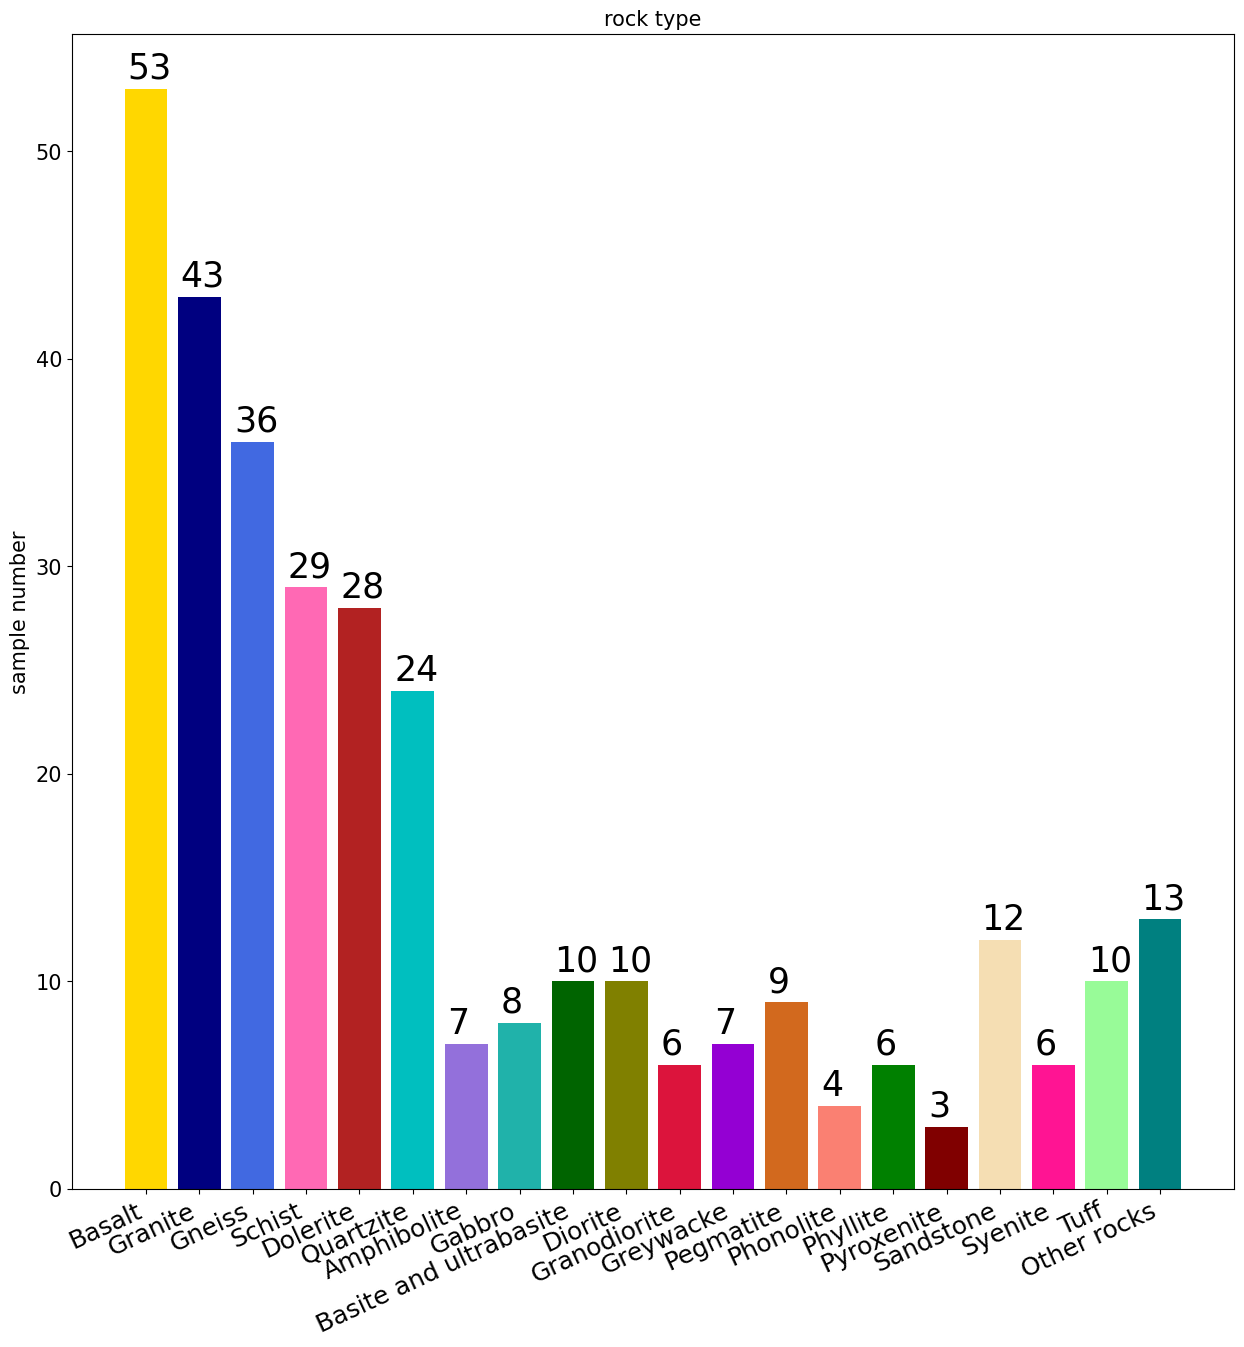

In [46]:
x_category = [
    "Basalt",    
    "Granite",    
    "Gneiss",    
    "Schist",    
    "Dolerite",    
    "Quartzite",    
    "Amphibolite",    
    "Gabbro",
    "Basite and ultrabasite",    
    "Diorite",    
    "Granodiorite",
    "Greywacke",
    "Pegmatite",
    "Phonolite",
    "Phyllite",
    "Pyroxenite",
    "Sandstone",
    "Syenite",
    "Tuff",
    "Other rocks",
]

y_sample_num = [
    len(NAPA_Basalt_df),
    len(NAPA_Granite_df),
    len(NAPA_Gneis_df),
    len(NAPA_schist_df),
    len(NAPA_Dolerite_df),
    len(NAPA_Quarzit_df),
    len(NAPA_amphibolite_df),
    len(NAPA_Gabbro_df),
    len(NAPA_Basite_and_ultrabasite_df),
    len(NAPA_Diorit_df),
    len(NAPA_Granodiorite_df),
    len(NAPA_Grauwacke_df),
    len(NAPA_Pegmatite_df),
    len(NAPA_Phonolite_df),
    len(NAPA_Phyllit_df),
    len(NAPA_Pyroxenit_df),
    len(NAPA_Sandstone_df),
    len(NAPA_Syenite_df),
    len(NAPA_Tuff_df),
    len(NAPA_Spectail_rocks_df),
]

# plot
figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

plt.bar(
    x_category,
    y_sample_num,
    color=[
        "gold",
        "navy",
        "royalblue",
        "hotpink",
        "firebrick",
        "c",
        "mediumpurple",
        "lightseagreen",
        "darkgreen",
        "olive",
        "crimson",
        "darkviolet",
        "chocolate",
        "salmon",
        "green",        
        "maroon",
        "wheat",
        "deeppink",
        "palegreen",
        "teal",
    ],
)

plt.title("rock type", fontsize=15)
plt.ylabel("sample number", fontsize=15)
plt.setp(ax1.get_xticklabels(), rotation=25, ha="right")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.xaxis.set_tick_params(labelsize=18)
# ax1.grid(visible=True, which='major' ,axis='y' , color='k', linestyle='-' , alpha=0.35)

for p in ax1.patches:
    ax1.annotate(
        "{:.0f}".format(p.get_height()),
        (p.get_x() + 0.05, p.get_height() + 0.5),
        fontsize=25,
    )

plt.savefig(
    export_fig_path_NAPA + "sample_histogramm_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

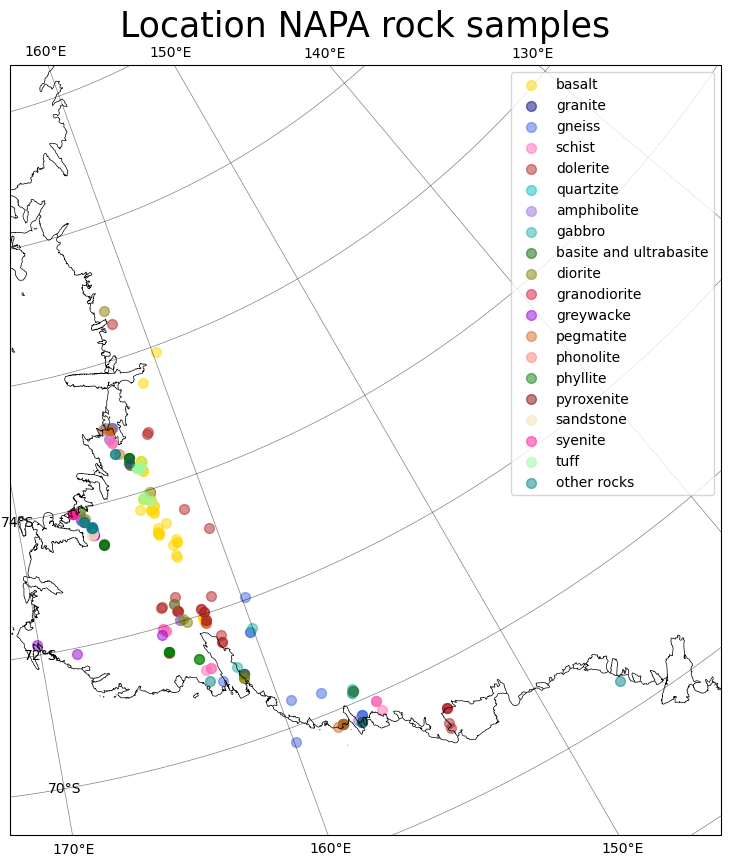

In [47]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)


NAPA_Basalt_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="gold", 
    markersize=50, 
    alpha=0.5, 
    label="basalt"
)

NAPA_Granite_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="navy", 
    markersize=50, 
    alpha=0.5, 
    label="granite"
)

NAPA_Gneis_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="royalblue", 
    markersize=50,
    alpha=0.5, 
    label="gneiss"
)

NAPA_schist_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="hotpink",
    markersize=50, 
    alpha=0.5, 
    label="schist"
)

NAPA_Dolerite_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="firebrick",
    markersize=50, 
    alpha=0.5,
    label="dolerite"
)

NAPA_Quarzit_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="c",
    markersize=50,
    alpha=0.5, 
    label="quartzite"
)

NAPA_amphibolite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="mediumpurple",
    markersize=50,
    alpha=0.5,
    label="amphibolite",
)

NAPA_Gabbro_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="lightseagreen",
    markersize=50, 
    alpha=0.5, 
    label="gabbro"
)

NAPA_Basite_and_ultrabasite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="darkgreen",
    markersize=50,
    alpha=0.5,
    label="basite and ultrabasite",
)

NAPA_Diorit_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="olive", 
    markersize=50, 
    alpha=0.5, 
    label="diorite"
)

NAPA_Granodiorite_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="crimson", 
    markersize=50, 
    alpha=0.5, 
    label="granodiorite"
)

NAPA_Grauwacke_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="darkviolet",
    markersize=50,
    alpha=0.5,
    label="greywacke"
)

NAPA_Pegmatite_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="chocolate",
    markersize=50, 
    alpha=0.5,
    label="pegmatite"
)

NAPA_Phonolite_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="salmon",
    markersize=50, 
    alpha=0.5, 
    label="phonolite"
)

NAPA_Phyllit_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="green",
    markersize=50, 
    alpha=0.5, 
    label="phyllite"
)

NAPA_Pyroxenit_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="maroon",
    markersize=50,
    alpha=0.5, 
    label="pyroxenite"
)

NAPA_Sandstone_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="wheat",
    markersize=50, 
    alpha=0.5,
    label="sandstone"
)

NAPA_Syenite_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="deeppink",
    markersize=50, 
    alpha=0.5, 
    label="syenite"
)

NAPA_Tuff_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="palegreen",
    markersize=50, 
    alpha=0.5, 
    label="tuff"
)

NAPA_Spectail_rocks_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="teal", 
    markersize=50, 
    alpha=0.5, 
    label="other rocks"
)

ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.3e6, -1e6])
ax1.legend(loc="upper right")
ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "rock_typ_location.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

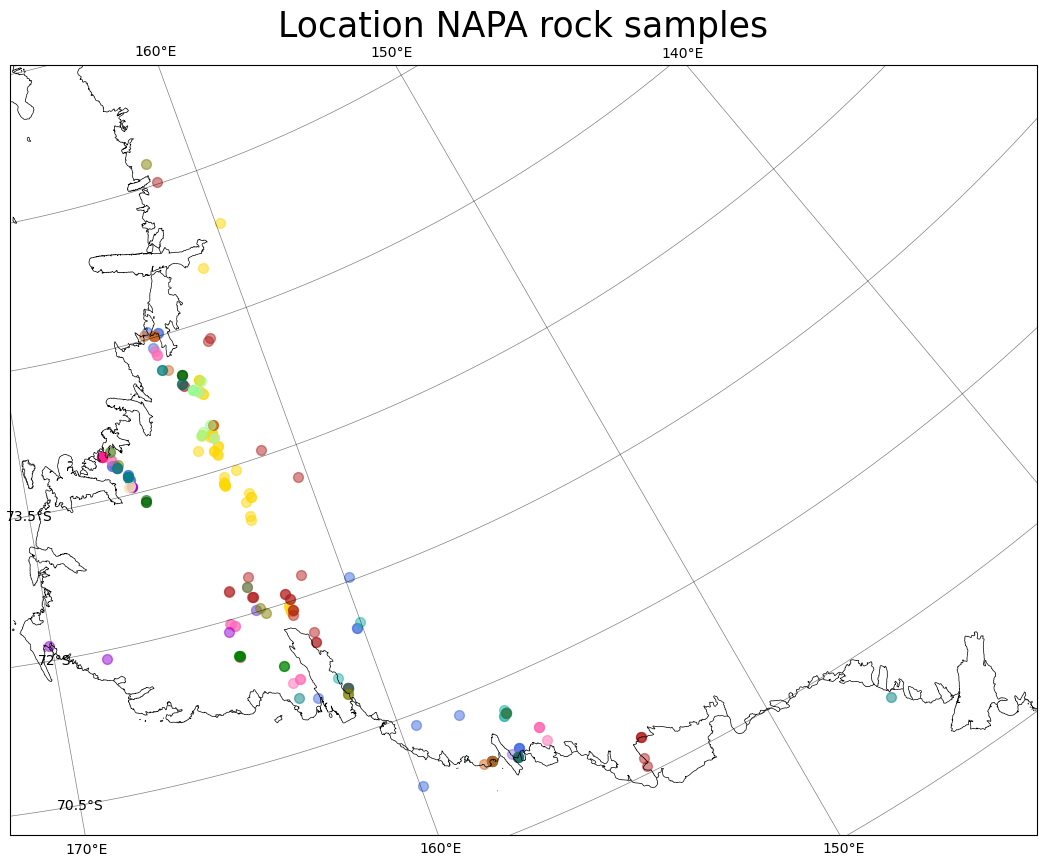

In [48]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)

NAPA_Basalt_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="gold", 
    markersize=50, 
    alpha=0.5, 
    label="basalt"
)

NAPA_Granite_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="navy", 
    markersize=50, 
    alpha=0.5, 
    label="granite"
)

NAPA_Gneis_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="royalblue", 
    markersize=50,
    alpha=0.5, 
    label="gneiss"
)

NAPA_schist_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="hotpink",
    markersize=50, 
    alpha=0.5, 
    label="schist"
)

NAPA_Dolerite_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="firebrick",
    markersize=50, 
    alpha=0.5,
    label="dolerite"
)

NAPA_Quarzit_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="c",
    markersize=50,
    alpha=0.5, 
    label="quartzite"
)

NAPA_amphibolite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="mediumpurple",
    markersize=50,
    alpha=0.5,
    label="amphibolite",
)

NAPA_Gabbro_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="lightseagreen",
    markersize=50, 
    alpha=0.5, 
    label="gabbro"
)

NAPA_Basite_and_ultrabasite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="darkgreen",
    markersize=50,
    alpha=0.5,
    label="basite and ultrabasite",
)

NAPA_Diorit_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="olive", 
    markersize=50, 
    alpha=0.5, 
    label="diorite"
)

NAPA_Granodiorite_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="crimson", 
    markersize=50, 
    alpha=0.5, 
    label="granodiorite"
)

NAPA_Grauwacke_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="darkviolet",
    markersize=50,
    alpha=0.5,
    label="greywacke"
)

NAPA_Pegmatite_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="chocolate",
    markersize=50, 
    alpha=0.5,
    label="pegmatite"
)

NAPA_Phonolite_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="salmon",
    markersize=50, 
    alpha=0.5, 
    label="phonolite"
)

NAPA_Phyllit_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="green",
    markersize=50, 
    alpha=0.5, 
    label="phyllite"
)

NAPA_Pyroxenit_ps_gpdf.plot(
    ax=ax1, 
    marker="o",
    color="maroon",
    markersize=50,
    alpha=0.5, 
    label="pyroxenite"
)

NAPA_Sandstone_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="wheat",
    markersize=50, 
    alpha=0.5,
    label="sandstone"
)

NAPA_Syenite_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="deeppink",
    markersize=50, 
    alpha=0.5, 
    label="syenite"
)

NAPA_Tuff_ps_gpdf.plot(
    ax=ax1, 
    marker="o", 
    color="palegreen",
    markersize=50, 
    alpha=0.5, 
    label="tuff"
)

NAPA_Spectail_rocks_ps_gpdf.plot(
    ax=ax1,
    marker="o", 
    color="teal", 
    markersize=50, 
    alpha=0.5, 
    label="other rocks"
)

ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.2e6, -1.3e6])

ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "rock_typ_location_zoom_paper.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### plot density box plot

In [49]:
amphibolite_all_sus_NAPA = np.vstack(
    [
        NAPA_amphibolite_df["susceptibility_1 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_2 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_3 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_4 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_5 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_6 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_7 (10-3 SI)"],
        NAPA_amphibolite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

basalt_all_sus_NAPA = np.vstack(
    [
        NAPA_Basalt_df["susceptibility_1 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_2 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_3 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_4 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_5 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_6 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_7 (10-3 SI)"],
        NAPA_Basalt_df["susceptibility_8 (10-3 SI)"],
    ]
).T

basite_ultrabasite_all_sus_NAPA = np.vstack(
    [
        NAPA_Basite_and_ultrabasite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Basite_and_ultrabasite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

diorite_all_sus_NAPA = np.vstack(
    [
        NAPA_Diorit_df["susceptibility_1 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_2 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_3 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_4 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_5 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_6 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_7 (10-3 SI)"],
        NAPA_Diorit_df["susceptibility_8 (10-3 SI)"],
    ]
).T

dolerite_all_sus_NAPA = np.vstack(
    [
        NAPA_Dolerite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Dolerite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

gabbro_all_sus_NAPA = np.vstack(
    [
        NAPA_Gabbro_df["susceptibility_1 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_2 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_3 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_4 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_5 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_6 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_7 (10-3 SI)"],
        NAPA_Gabbro_df["susceptibility_8 (10-3 SI)"],
    ]
).T

gneiss_all_sus_NAPA = np.vstack(
    [
        NAPA_Gneis_df["susceptibility_1 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_2 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_3 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_4 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_5 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_6 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_7 (10-3 SI)"],
        NAPA_Gneis_df["susceptibility_8 (10-3 SI)"],
    ]
).T

granite_all_sus_NAPA = np.vstack(
    [
        NAPA_Granite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Granite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

granodiorite_all_sus_NAPA = np.vstack(
    [
        NAPA_Granodiorite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Granodiorite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

greywacke_all_sus_NAPA = np.vstack(
    [
        NAPA_Grauwacke_df["susceptibility_1 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_2 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_3 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_4 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_5 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_6 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_7 (10-3 SI)"],
        NAPA_Grauwacke_df["susceptibility_8 (10-3 SI)"],
    ]
).T

pegmatite_all_sus_NAPA = np.vstack(
    [
        NAPA_Pegmatite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Pegmatite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

phonolite_all_sus_NAPA = np.vstack(
    [
        NAPA_Phonolite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Phonolite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

phyllite_all_sus_NAPA = np.vstack(
    [
        NAPA_Phyllit_df["susceptibility_1 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_2 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_3 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_4 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_5 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_6 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_7 (10-3 SI)"],
        NAPA_Phyllit_df["susceptibility_8 (10-3 SI)"],
    ]
).T

pyroxenite_all_sus_NAPA = np.vstack(
    [
        NAPA_Pyroxenit_df["susceptibility_1 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_2 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_3 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_4 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_5 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_6 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_7 (10-3 SI)"],
        NAPA_Pyroxenit_df["susceptibility_8 (10-3 SI)"],
    ]
).T

quartzite_all_sus_NAPA = np.vstack(
    [
        NAPA_Quarzit_df["susceptibility_1 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_2 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_3 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_4 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_5 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_6 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_7 (10-3 SI)"],
        NAPA_Quarzit_df["susceptibility_8 (10-3 SI)"],
    ]
).T

sandstone_all_sus_NAPA = np.vstack(
    [
        NAPA_Sandstone_df["susceptibility_1 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_2 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_3 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_4 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_5 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_6 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_7 (10-3 SI)"],
        NAPA_Sandstone_df["susceptibility_8 (10-3 SI)"],
    ]
).T

schist_all_sus_NAPA = np.vstack(
    [
        NAPA_schist_df["susceptibility_1 (10-3 SI)"],
        NAPA_schist_df["susceptibility_2 (10-3 SI)"],
        NAPA_schist_df["susceptibility_3 (10-3 SI)"],
        NAPA_schist_df["susceptibility_4 (10-3 SI)"],
        NAPA_schist_df["susceptibility_5 (10-3 SI)"],
        NAPA_schist_df["susceptibility_6 (10-3 SI)"],
        NAPA_schist_df["susceptibility_7 (10-3 SI)"],
        NAPA_schist_df["susceptibility_8 (10-3 SI)"],
    ]
).T


syenite_all_sus_NAPA = np.vstack(
    [
        NAPA_Syenite_df["susceptibility_1 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_2 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_3 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_4 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_5 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_6 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_7 (10-3 SI)"],
        NAPA_Syenite_df["susceptibility_8 (10-3 SI)"],
    ]
).T

tuff_all_sus_NAPA = np.vstack(
    [
        NAPA_Tuff_df["susceptibility_1 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_2 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_3 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_4 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_5 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_6 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_7 (10-3 SI)"],
        NAPA_Tuff_df["susceptibility_8 (10-3 SI)"],
    ]
).T

special_rocks_all_sus_NAPA = np.vstack(
    [
        NAPA_Spectail_rocks_df["susceptibility_1 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_2 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_3 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_4 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_5 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_6 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_7 (10-3 SI)"],
        NAPA_Spectail_rocks_df["susceptibility_8 (10-3 SI)"],
    ]
).T

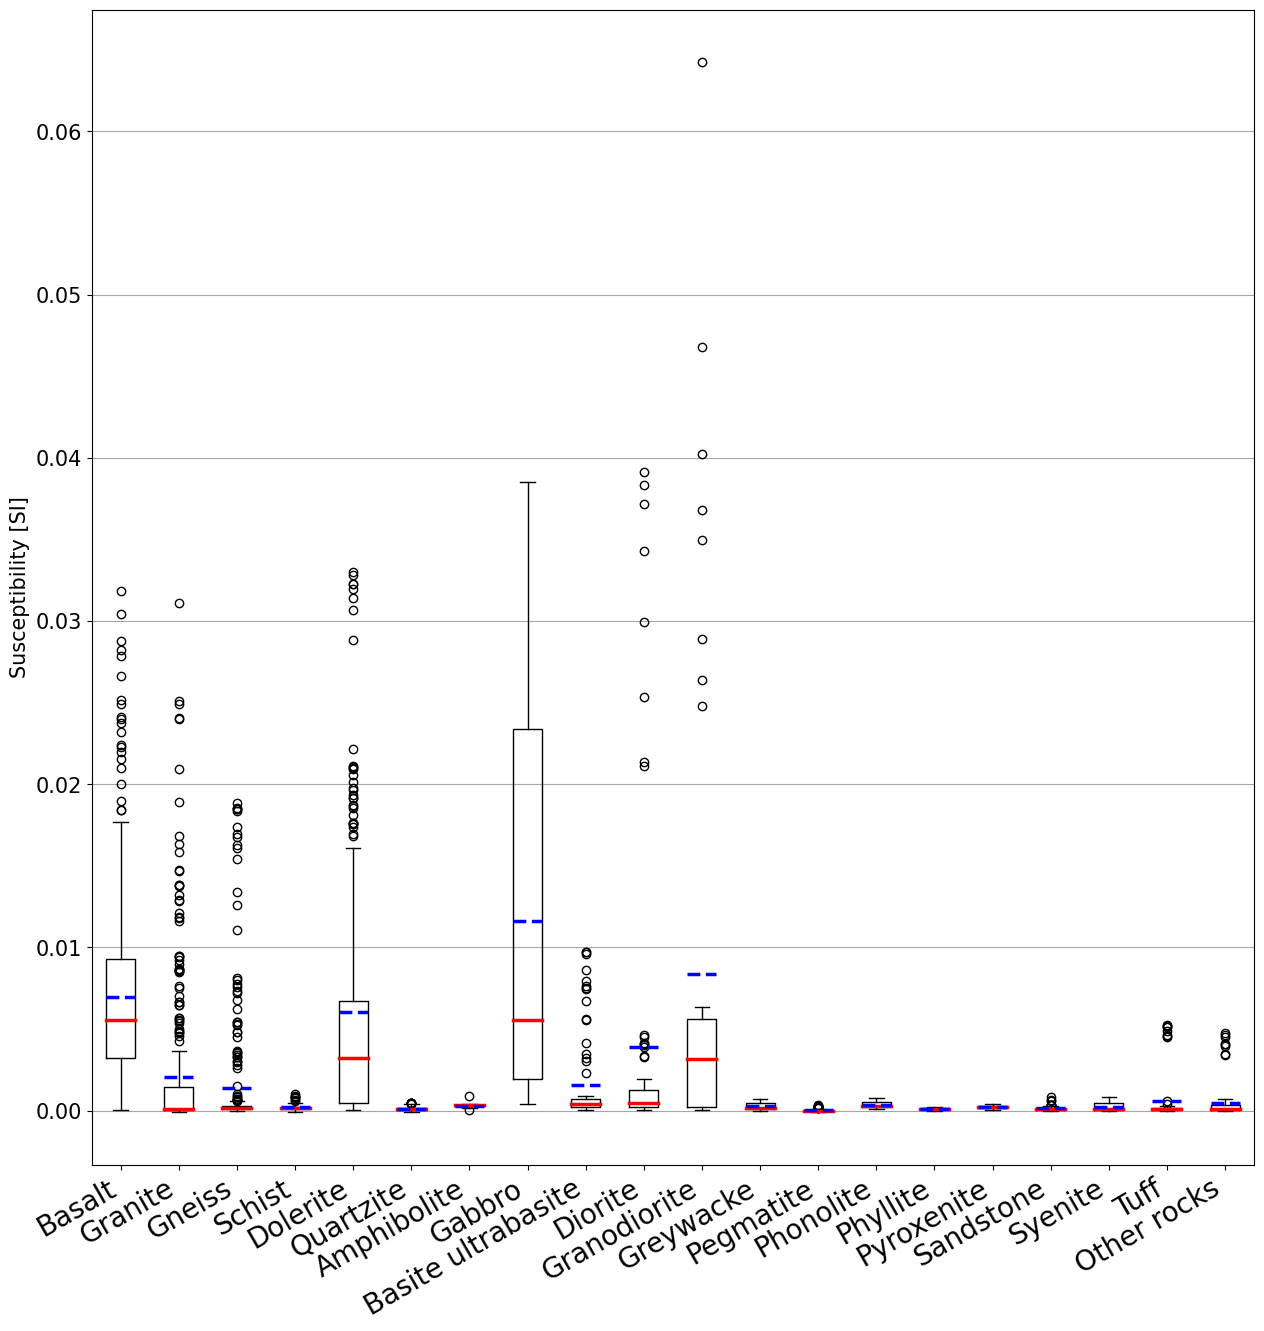

In [50]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


sus_values_ls = [
    basalt_all_sus_NAPA.flatten(),
    granite_all_sus_NAPA.flatten(),
    gneiss_all_sus_NAPA.flatten(),
    schist_all_sus_NAPA.flatten(),
    dolerite_all_sus_NAPA.flatten(),
    quartzite_all_sus_NAPA.flatten(),
    amphibolite_all_sus_NAPA.flatten(),
    gabbro_all_sus_NAPA.flatten(),
    basite_ultrabasite_all_sus_NAPA.flatten(),
    diorite_all_sus_NAPA.flatten(),
    granodiorite_all_sus_NAPA.flatten(),
    greywacke_all_sus_NAPA.flatten(),
    pegmatite_all_sus_NAPA.flatten(),
    phonolite_all_sus_NAPA.flatten(),
    phyllite_all_sus_NAPA.flatten(),
    pyroxenite_all_sus_NAPA.flatten(),
    sandstone_all_sus_NAPA.flatten(),
    syenite_all_sus_NAPA.flatten(),
    tuff_all_sus_NAPA.flatten(),
    special_rocks_all_sus_NAPA.flatten(),
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    sus_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Basalt",
    "Granite",
    "Gneiss",
    "Schist",
    "Dolerite",
    "Quartzite",
    "Amphibolite",
    "Gabbro",
    "Basite ultrabasite",
    "Diorite",
    "Granodiorite",
    "Greywacke",
    "Pegmatite",
    "Phonolite",
    "Phyllite",
    "Pyroxenite",
    "Sandstone",
    "Syenite",
    "Tuff",
    "Other rocks",
]

x_ticks_num = np.arange(1, 21, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right")
ax1.set_ylabel("Susceptibility [SI]", fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_susceptibility_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### Plot density box plot 

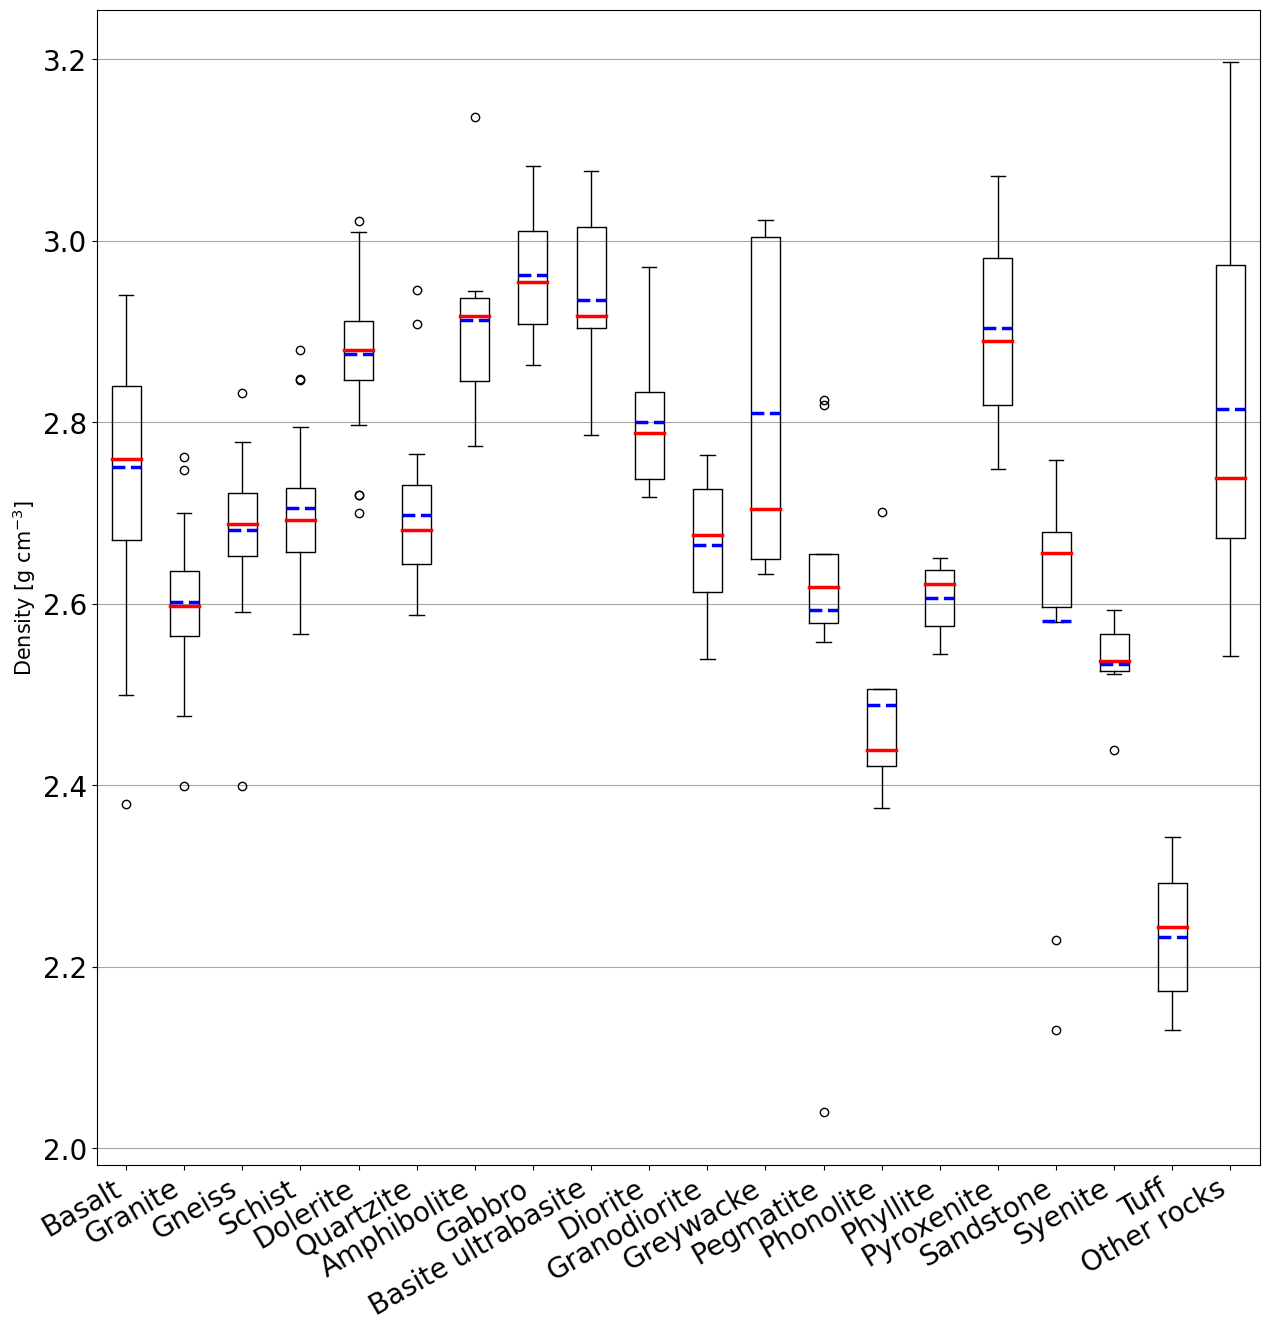

In [51]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


dens_values_ls = [
    NAPA_Basalt_df["density (g/cm^3)"],
    NAPA_Granite_df["density (g/cm^3)"],
    NAPA_Gneis_df["density (g/cm^3)"],
    NAPA_schist_df["density (g/cm^3)"],
    NAPA_Dolerite_df["density (g/cm^3)"],
    NAPA_Quarzit_df["density (g/cm^3)"],
    NAPA_amphibolite_df["density (g/cm^3)"],
    NAPA_Gabbro_df["density (g/cm^3)"],
    NAPA_Basite_and_ultrabasite_df["density (g/cm^3)"],
    NAPA_Diorit_df["density (g/cm^3)"],
    NAPA_Granodiorite_df["density (g/cm^3)"],
    NAPA_Grauwacke_df["density (g/cm^3)"],
    NAPA_Pegmatite_df["density (g/cm^3)"],
    NAPA_Phonolite_df["density (g/cm^3)"],
    NAPA_Phyllit_df["density (g/cm^3)"],
    NAPA_Pyroxenit_df["density (g/cm^3)"],
    NAPA_Sandstone_df["density (g/cm^3)"],
    NAPA_Syenite_df["density (g/cm^3)"],
    NAPA_Tuff_df["density (g/cm^3)"],
    NAPA_Spectail_rocks_df["density (g/cm^3)"],
]


figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    dens_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Basalt",
    "Granite",
    "Gneiss",
    "Schist",
    "Dolerite",
    "Quartzite",
    "Amphibolite",
    "Gabbro",
    "Basite ultrabasite",
    "Diorite",
    "Granodiorite",
    "Greywacke",
    "Pegmatite",
    "Phonolite",
    "Phyllite",
    "Pyroxenite",
    "Sandstone",
    "Syenite",
    "Tuff",
    "Other rocks",
]

x_ticks_num = np.arange(1, 21, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right")
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_density_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

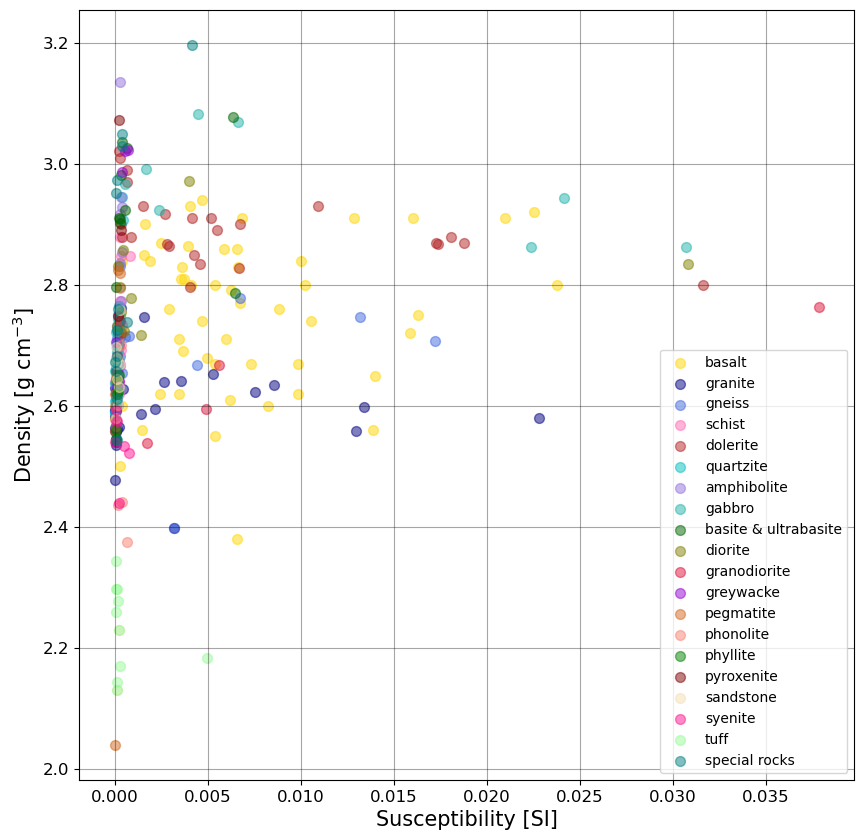

In [52]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")

ax1 = plt.subplot(1, 1, 1)

NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
    label="basalt",
)

NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
    label="granite",
)

NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
    label="gneiss",
)

NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="schist",
)

NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
    label="dolerite",
)


NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
    label="quartzite",
)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="amphibolite",
)

NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
    label="gabbro",
)


NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="basite & ultrabasite",
)

NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="olive",
    alpha=0.5,
    label="diorite",
)

NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
    label="granodiorite",
)

NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="darkviolet",
    alpha=0.5,
    label="greywacke",
)

NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="pegmatite",
)

NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
    label="phonolite",
)

NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
    label="phyllite",
)

NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
    label="pyroxenite",
)


NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="wheat",
    alpha=0.5,
    label="sandstone",
)

NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
    label="syenite",
)

NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
    label="tuff",
)

NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
    label="special rocks",
)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_colored.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

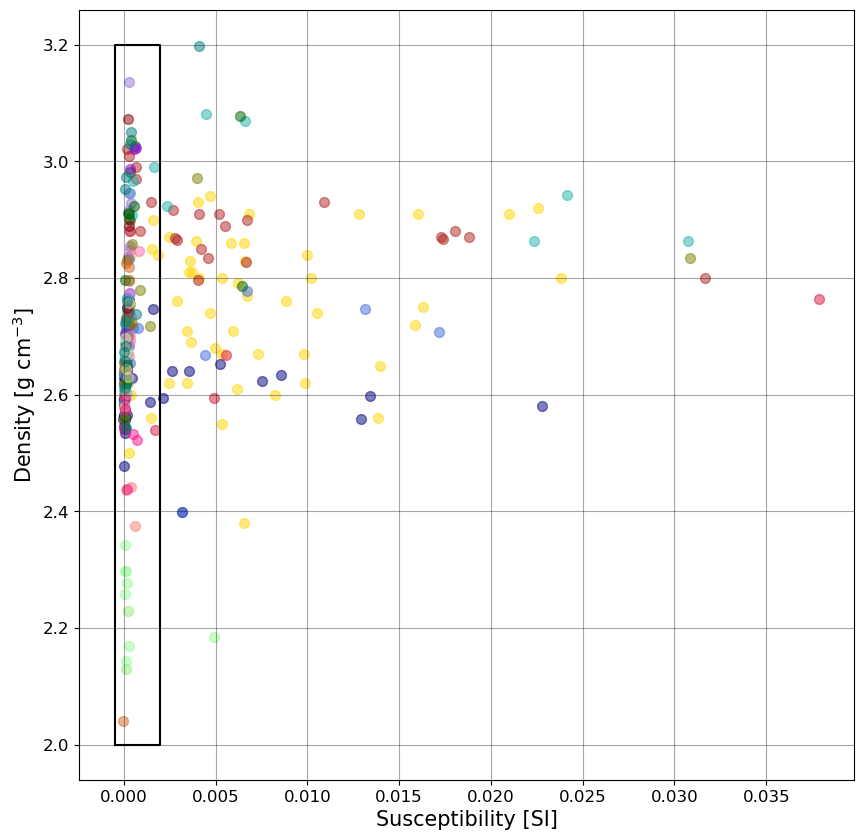

In [53]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
)

NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
)

NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
)

NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
)

NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
)


NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
)

NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
)


NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
)

NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="olive",
    alpha=0.5,
)

NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
)

NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="darkviolet",
    alpha=0.5,
)

NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
)

NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
)

NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
)

NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
)


NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="wheat",
    alpha=0.5,
)

NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
)

NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
)

NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_colored_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

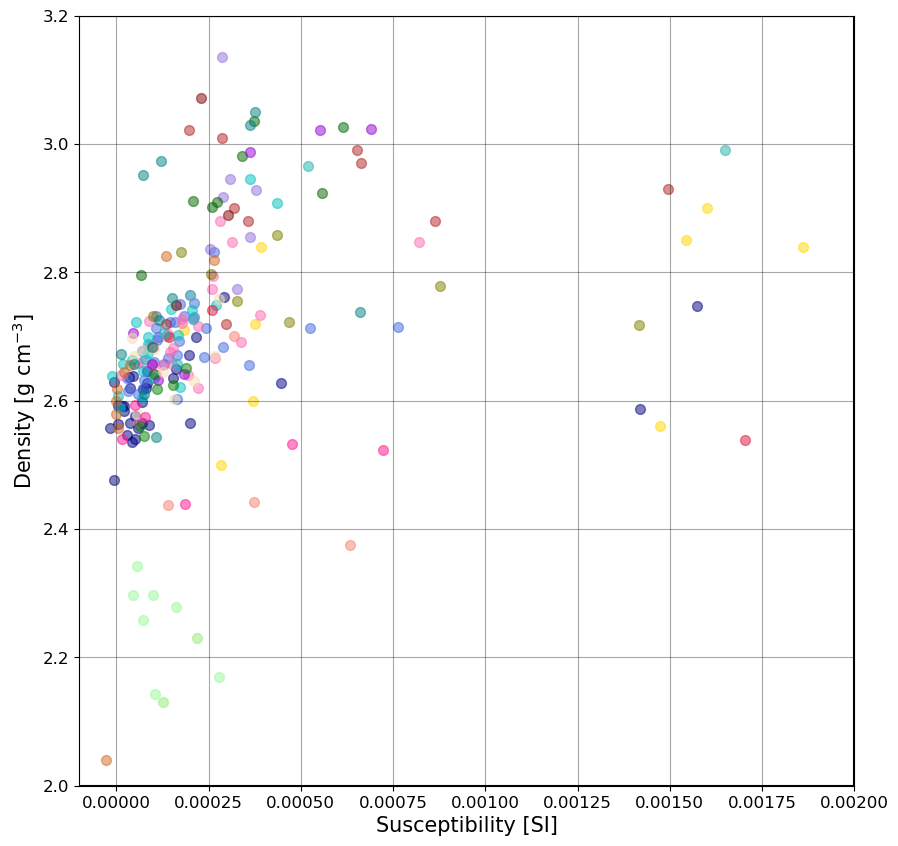

In [54]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
)

NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
)

NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
)

NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
)

NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
)


NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
)

NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
)


NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
)

NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="olive",
    alpha=0.5,
)

NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
)

NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="darkviolet",
    alpha=0.5,
)

NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
)

NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
)

NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
)

NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
)


NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="wheat",
    alpha=0.5,
)

NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
)

NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
)

NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility_average (10-3 SI)",
    y="density (g/cm^3)",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
)


ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(loc="lower right")

ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)